In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\horse data\horses_2019.csv")
df_1.head(2)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,TR,OR,father,mother,gfather,runners,margin,weight,res_win,res_place
0,11499,Picken,4.0,6.0,0.312500,0,J Size,Joao Moreira,1,NaN,...,NaN,54.0,Duporth,Baby Boom,Redoute's Choice,13,1.217349,56,1.0,1
1,11499,Noble De Love,6.0,7.0,0.333333,1,F C Lor,Zac Purton,2,nk,...,NaN,53.0,Commands,Terrenora,Encosta De Lago,13,1.217349,56,0.0,1


In [3]:
df_2 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\race data\races_2019.csv")
df_2.head(2)

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class
0,11499,Sha Tin (HK),06:30,19/01/01,Wong Leng Handicap (Class 4) (3yo+) (Course C)...,NaN,NaN,3yo+,7f,Good,NaN,"[52492.49, 20260.26, 10590.59, 5525.53, 3223.22]",82.46,92092.0,1407.0,HK,1,0
1,26954,Sha Tin (HK),05:00,19/01/01,Kowloon Peak Handicap (Class 5) (3yo+) (Course...,NaN,NaN,3yo+,1m,Good,NaN,"[39369.37, 15195.2, 7942.94, 4144.14, 2417.42]",95.75,69068.0,1609.0,HK,1,0


In [4]:
df_3 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\horse data\horses_2020.csv")
df_3.head(2)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,10312,Waterproof,4.0,9.0,0.076923,0,Shaun Keightley,Brendan Powell,1,NaN,...,NaN,Pour Moi,Laughing Water,Duke Of Marmalade,9,1.199095,66,1.0,1.0,NaN
1,10312,Eva's Diva,6.0,7.0,0.444444,1,Phil Middleton,Mr Sam Lee,2,15,...,110.0,Getaway,Shouette,Sadler's Wells,9,1.199095,65,0.0,1.0,NaN


In [5]:
df_4 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Horse Race Prediction\race data\races_2020.csv")
df_4.head(2)

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,Good To Soft,9 hurdles,"[5198.4, 1526.4, 763.2, 381.6]",253.88,7869,3218.0,GB,10,4,NaN
1,10896,Cheltenham,03:50,20/01/01,EBF Stallions &amp; Cheltenham Pony Club (A St...,Class 1,NaN,4yo,1m6f,Soft,NaN,"[14237.5, 5342.5, 2675.0, 1332.5, 670.0, 335.0]",206.55,24592,2815.0,GB,5,1,NaN


## Consolidation of data: ##

In [6]:
df = pd.concat([df_1,df_2,df_3,df_4],ignore_index = True)
df.head(2)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,price,currency
0,11499,Picken,4.0,6.0,0.312500,0.0,J Size,Joao Moreira,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11499,Noble De Love,6.0,7.0,0.333333,1.0,F C Lor,Zac Purton,2.0,nk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.size

16259298

## Rows and columns: ##

In [8]:
print(f"rows:{df.shape[0]},columns:{df.shape[1]}")

rows:353463,columns:46


In [9]:
df.columns

Index(['rid', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
       'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
       'weightSt', 'weightLb', 'overWeight', 'outHandicap', 'headGear', 'RPR',
       'TR', 'OR', 'father', 'mother', 'gfather', 'runners', 'margin',
       'weight', 'res_win', 'res_place', 'course', 'time', 'date', 'title',
       'rclass', 'band', 'ages', 'distance', 'condition', 'hurdles', 'prizes',
       'winningTime', 'prize', 'metric', 'countryCode', 'ncond', 'class',
       'price', 'currency'],
      dtype='object')

## Removal of unwanted columns: ##

In [10]:
cols = ['rid','saddle','positionL','dist','weightSt', 'weightLb', 'overWeight', 'outHandicap', 'headGear', 'RPR','TR', 'OR',
         'father', 'mother', 'gfather', 'runners', 'margin','res_place','course','time','title','band','condition','hurdles','prizes','winningTime',
         'prize','metric','class','ncond','ages']

In [11]:
df.drop(columns=cols,inplace=True)

In [12]:
df.columns

Index(['horseName', 'age', 'decimalPrice', 'isFav', 'trainerName',
       'jockeyName', 'position', 'weight', 'res_win', 'date', 'rclass',
       'distance', 'countryCode', 'price', 'currency'],
      dtype='object')

In [13]:
df.drop(columns=['price','currency'],inplace=True)

In [14]:
df.columns

Index(['horseName', 'age', 'decimalPrice', 'isFav', 'trainerName',
       'jockeyName', 'position', 'weight', 'res_win', 'date', 'rclass',
       'distance', 'countryCode'],
      dtype='object')

In [15]:
df.head(2)

,horseName,age,decimalPrice,isFav,trainerName,jockeyName,position,weight,res_win,date,rclass,distance,countryCode
0,Picken,4.0,0.312500,0.0,J Size,Joao Moreira,1.0,56.0,1.0,NaN,NaN,NaN,NaN
1,Noble De Love,6.0,0.333333,1.0,F C Lor,Zac Purton,2.0,56.0,0.0,NaN,NaN,NaN,NaN


## Date column handling: ##

In [16]:
df['date'].unique()

array([nan, '19/01/01', '19/01/02', '19/01/03', '19/01/04', '19/01/05',
       '19/01/06', '19/01/07', '19/01/08', '19/01/09', '19/01/10',
       '19/01/11', '19/01/12', '19/01/13', '19/01/14', '19/01/15',
       '19/01/16', '19/01/17', '19/01/18', '19/01/19', '19/01/20',
       '19/01/21', '19/01/22', '19/01/23', '19/01/24', '19/01/25',
       '19/01/26', '19/01/27', '19/01/28', '19/01/29', '19/01/30',
       '19/01/31', '19/02/01', '19/02/02', '19/02/03', '19/02/04',
       '19/02/05', '19/02/06', '19/02/07', '19/02/08', '19/02/09',
       '19/02/10', '19/02/11', '19/02/12', '19/02/13', '19/02/14',
       '19/02/15', '19/02/16', '19/02/17', '19/02/18', '19/02/19',
       '19/02/20', '19/02/21', '19/02/22', '19/02/23', '19/02/24',
       '19/02/25', '19/02/26', '19/02/27', '19/02/28', '19/03/01',
       '19/03/02', '19/03/03', '19/03/04', '19/03/05', '19/03/06',
       '19/03/07', '19/03/08', '19/03/09', '19/03/10', '19/03/11',
       '19/03/12', '19/03/13', '19/03/14', '19/03/15', '1

In [17]:
df['date'] = df['date'].astype(str)

In [18]:
df['date'] = df['date'].str.strip()

In [19]:
df.dtypes

horseName        object
age             float64
decimalPrice    float64
isFav           float64
trainerName      object
jockeyName       object
position        float64
weight          float64
res_win         float64
date             object
rclass           object
distance         object
countryCode      object
dtype: object

In [20]:
def date_conversion(date):
    return date.split()[0]


In [21]:
df['date'] = df['date'].apply(lambda x: date_conversion(x))

In [22]:
df['date'].unique()

array(['nan', '19/01/01', '19/01/02', '19/01/03', '19/01/04', '19/01/05',
       '19/01/06', '19/01/07', '19/01/08', '19/01/09', '19/01/10',
       '19/01/11', '19/01/12', '19/01/13', '19/01/14', '19/01/15',
       '19/01/16', '19/01/17', '19/01/18', '19/01/19', '19/01/20',
       '19/01/21', '19/01/22', '19/01/23', '19/01/24', '19/01/25',
       '19/01/26', '19/01/27', '19/01/28', '19/01/29', '19/01/30',
       '19/01/31', '19/02/01', '19/02/02', '19/02/03', '19/02/04',
       '19/02/05', '19/02/06', '19/02/07', '19/02/08', '19/02/09',
       '19/02/10', '19/02/11', '19/02/12', '19/02/13', '19/02/14',
       '19/02/15', '19/02/16', '19/02/17', '19/02/18', '19/02/19',
       '19/02/20', '19/02/21', '19/02/22', '19/02/23', '19/02/24',
       '19/02/25', '19/02/26', '19/02/27', '19/02/28', '19/03/01',
       '19/03/02', '19/03/03', '19/03/04', '19/03/05', '19/03/06',
       '19/03/07', '19/03/08', '19/03/09', '19/03/10', '19/03/11',
       '19/03/12', '19/03/13', '19/03/14', '19/03/15', 

In [23]:
df['date'].isna().sum()

0

## Data type conversion: ##

In [24]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')

In [25]:
df.dtypes

horseName               object
age                    float64
decimalPrice           float64
isFav                  float64
trainerName             object
jockeyName              object
position               float64
weight                 float64
res_win                float64
date            datetime64[ns]
rclass                  object
distance                object
countryCode             object
dtype: object

In [26]:
df['date'].unique()

<DatetimeArray>
[                'NaT', '2001-01-19 00:00:00', '2002-01-19 00:00:00',
 '2003-01-19 00:00:00', '2004-01-19 00:00:00', '2005-01-19 00:00:00',
 '2006-01-19 00:00:00', '2007-01-19 00:00:00', '2008-01-19 00:00:00',
 '2009-01-19 00:00:00',
 ...
 '2026-11-20 00:00:00', '2027-11-20 00:00:00', '2028-11-20 00:00:00',
 '2029-11-20 00:00:00', '2030-11-20 00:00:00', '2001-12-20 00:00:00',
 '2002-12-20 00:00:00', '2003-12-20 00:00:00', '2004-12-20 00:00:00',
 '2005-12-20 00:00:00']
Length: 703, dtype: datetime64[ns]

In [27]:
df['date'].isna().sum()

321362

## Null values imputation: ##

In [28]:
df['date'] = df['date'].fillna(df['date'].mode()[0])

In [29]:
df['date'].isna().sum()

0

In [30]:
df['date'].unique()

<DatetimeArray>
['2011-05-19 00:00:00', '2001-01-19 00:00:00', '2002-01-19 00:00:00',
 '2003-01-19 00:00:00', '2004-01-19 00:00:00', '2005-01-19 00:00:00',
 '2006-01-19 00:00:00', '2007-01-19 00:00:00', '2008-01-19 00:00:00',
 '2009-01-19 00:00:00',
 ...
 '2026-11-20 00:00:00', '2027-11-20 00:00:00', '2028-11-20 00:00:00',
 '2029-11-20 00:00:00', '2030-11-20 00:00:00', '2001-12-20 00:00:00',
 '2002-12-20 00:00:00', '2003-12-20 00:00:00', '2004-12-20 00:00:00',
 '2005-12-20 00:00:00']
Length: 702, dtype: datetime64[ns]

In [31]:
df.dtypes

horseName               object
age                    float64
decimalPrice           float64
isFav                  float64
trainerName             object
jockeyName              object
position               float64
weight                 float64
res_win                float64
date            datetime64[ns]
rclass                  object
distance                object
countryCode             object
dtype: object

In [32]:
df['date']

0        2011-05-19
1        2011-05-19
2        2011-05-19
3        2011-05-19
4        2011-05-19
            ...    
353458   2005-12-20
353459   2005-12-20
353460   2005-12-20
353461   2005-12-20
353462   2005-12-20
Name: date, Length: 353463, dtype: datetime64[ns]

## Feature Engineering - creating new features - year,month,day ##

In [33]:
df['year'] = pd.to_datetime(df['date'],errors='coerce').dt.year

In [34]:
df.head(2)

,horseName,age,decimalPrice,isFav,trainerName,jockeyName,position,weight,res_win,date,rclass,distance,countryCode,year
0,Picken,4.0,0.312500,0.0,J Size,Joao Moreira,1.0,56.0,1.0,2011-05-19,NaN,NaN,NaN,2011
1,Noble De Love,6.0,0.333333,1.0,F C Lor,Zac Purton,2.0,56.0,0.0,2011-05-19,NaN,NaN,NaN,2011


In [35]:
df['year'].unique()

array([2011, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031])

In [36]:
df['day'] = pd.to_datetime(df['date'],errors='coerce').dt.day_name()

In [37]:
df.head(2)

,horseName,age,decimalPrice,isFav,trainerName,jockeyName,position,weight,res_win,date,rclass,distance,countryCode,year,day
0,Picken,4.0,0.312500,0.0,J Size,Joao Moreira,1.0,56.0,1.0,2011-05-19,NaN,NaN,NaN,2011,Thursday
1,Noble De Love,6.0,0.333333,1.0,F C Lor,Zac Purton,2.0,56.0,0.0,2011-05-19,NaN,NaN,NaN,2011,Thursday


In [38]:
df['day'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Wednesday',
       'Tuesday'], dtype=object)

In [39]:
df['month'] = pd.to_datetime(df['date'],errors='coerce').dt.month_name()

In [40]:
df.head(2)

,horseName,age,decimalPrice,isFav,trainerName,jockeyName,position,weight,res_win,date,rclass,distance,countryCode,year,day,month
0,Picken,4.0,0.312500,0.0,J Size,Joao Moreira,1.0,56.0,1.0,2011-05-19,NaN,NaN,NaN,2011,Thursday,May
1,Noble De Love,6.0,0.333333,1.0,F C Lor,Zac Purton,2.0,56.0,0.0,2011-05-19,NaN,NaN,NaN,2011,Thursday,May


In [41]:
df['month'].unique()

array(['May', 'January', 'February', 'March', 'April', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [42]:
df['weight'].unique()

array([ 56.,  57.,  54.,  59.,  53.,  55.,  52.,  60.,  51.,  58.,  48.,
        75.,  73.,  71.,  70.,  69.,  68.,  65.,  67.,  72.,  74.,  76.,
        50.,  66.,  64.,  63.,  62.,  61.,  49.,  77.,  78.,  79.,  44.,
        47.,  43.,  nan, 105.])

In [43]:
df.size

5655408

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353463 entries, 0 to 353462
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   horseName     321362 non-null  object        
 1   age           321362 non-null  float64       
 2   decimalPrice  321362 non-null  float64       
 3   isFav         321362 non-null  float64       
 4   trainerName   321341 non-null  object        
 5   jockeyName    321359 non-null  object        
 6   position      321362 non-null  float64       
 7   weight        321362 non-null  float64       
 8   res_win       321362 non-null  float64       
 9   date          353463 non-null  datetime64[ns]
 10  rclass        17278 non-null   object        
 11  distance      32101 non-null   object        
 12  countryCode   32101 non-null   object        
 13  year          353463 non-null  int32         
 14  day           353463 non-null  object        
 15  month         353

## Removal of duplicate values ##

In [45]:
df.duplicated().sum()

11239

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().sum()

0

## Unique values in each column ##

In [48]:
for col in df.columns:
    print(f" {col} : {df[col].unique()}")

 horseName : ['Picken' 'Noble De Love' 'Fresh Power' ... "Aimee's Jewel"
 'Times Ticking' 'Awesome Al']
 age : [ 4.  6.  5.  3.  7.  9.  8. 10. 12. 14. 11. 13. 15.  2. 16. nan 17. 27.]
 decimalPrice : [0.3125     0.33333333 0.2        0.01754386 0.09090909 0.00458716
 0.02941176 0.02702703 0.16129032 0.02777778 0.0044843  0.00497512
 0.00350877 0.16949153 0.13333333 0.35714286 0.12987013 0.04347826
 0.1369863  0.03448276 0.03846154 0.04761905 0.63636364 0.23076923
 0.15384615 0.25       0.5        0.07692308 0.00990099 0.01492537
 0.01960784 0.00662252 0.30769231 0.38095238 0.125      0.06666667
 0.14285714 0.22222222 0.05882353 0.11111111 0.36363636 0.18181818
 0.26315789 0.3030303  0.15151515 0.01234568 0.07142857 0.00280899
 0.01075269 0.04166667 0.01369863 0.03030303 0.00854701 0.1
 0.42105263 0.08333333 0.57894737 0.02439024 0.28571429 0.11764706
 0.16666667 0.34782609 0.54545455 0.52380952 0.26666667 0.47619048
 0.03225806 0.0625     0.05       0.37735849 0.025      0.18518519
 0

In [49]:
df.isna().sum()

horseName        21096
age              21096
decimalPrice     21096
isFav            21096
trainerName      21117
jockeyName       21099
position         21096
weight           21096
res_win          21096
date                 0
rclass          329334
distance        321128
countryCode     321128
year                 0
day                  0
month                0
dtype: int64

## Distance column handling: ##

In [50]:
df['distance'].unique()

array([nan, '7f', '1m', '2m5f', '2m2½f', '2m', '3m2½f', '3m', '2m3½f',
       '1m7½f', '3m1f', '2m2f', '6f', '2m4½f', '2m3f', '2m4f', '1m6f',
       '2m1f', '5f', '3m1½f', '2m7½f', '6½f', '2m5½f', '2m1½f', '2m½f',
       '1m1½f', '1m2f', '1m½f', '3m½f', '1m4f', '7½f', '1m1f', '1m4½f',
       '1m2½f', '2m7f', '2m6f', '1m3f', '3m4½f', '3m2f', '3m6f', '3m5f',
       '1m7f', '2m6½f', '1m5f', '3m3f', '1m5½f', '5½f', '3m6½f', '4m½f',
       '3m7½f', '4m', '4m2f', '4½f', '4m2½f', '3m3½f', '1m3½f', '3m4f',
       '3m5½f', '1m6½f', '3m7f', '4f', '4m1f'], dtype=object)

In [51]:
def distance_conversion(distance):
    distance = str(distance)
    fractions = {'½':0.5,'¼':0.25,'¾':0.75}
    miles,furlong = 0,''
    if 'm' in distance:
        miles_part,furlong_part = distance.split('m')
        miles = int(miles_part)*8
        furlong = furlong_part.replace('f','')
    elif 'f' in distance:
        furlong = distance.replace('f','')
    for frac,value in fractions.items():
        furlong = furlong.replace(frac,str(value))
    return miles+float(furlong) if furlong else miles


In [52]:
df['distance'] = df['distance'].apply(lambda x: distance_conversion(x))

In [53]:
df['distance'].unique()

array([ 0. ,  7. ,  8. , 21. , 36.5, 16. , 44.5, 24. , 46.5, 78.5, 25. ,
       18. ,  6. , 56.5, 19. , 20. , 14. , 17. ,  5. , 34.5, 86.5, 60.5,
       66.5, 26.5, 16.5, 18.5, 10. ,  8.5, 24.5, 12. , 70.5,  9. , 48.5,
       28.5, 23. , 22. , 11. , 64.5, 26. , 30. , 29. , 15. , 76.5, 13. ,
       27. , 58.5, 50.5, 84.5, 32.5, 94.5, 32. , 34. , 40.5, 52.5, 54.5,
       38.5, 28. , 74.5, 68.5, 31. ,  4. , 33. ])

In [54]:
df.isna().sum()

horseName        21096
age              21096
decimalPrice     21096
isFav            21096
trainerName      21117
jockeyName       21099
position         21096
weight           21096
res_win          21096
date                 0
rclass          329334
distance             0
countryCode     321128
year                 0
day                  0
month                0
dtype: int64

In [55]:
df.dtypes

horseName               object
age                    float64
decimalPrice           float64
isFav                  float64
trainerName             object
jockeyName              object
position               float64
weight                 float64
res_win                float64
date            datetime64[ns]
rclass                  object
distance               float64
countryCode             object
year                     int32
day                     object
month                   object
dtype: object

## Numerical columns: ##

In [56]:
num_cols = df.drop(columns=['res_win','isFav']).select_dtypes(include=float)

In [57]:
num_cols

,age,decimalPrice,position,weight,distance
0,4.0,0.312500,1.0,56.0,0.0
1,6.0,0.333333,2.0,56.0,0.0
2,5.0,0.200000,3.0,57.0,0.0
3,4.0,0.017544,4.0,56.0,0.0
4,5.0,0.090909,5.0,54.0,0.0
...,...,...,...,...,...
353456,NaN,NaN,NaN,NaN,6.0
353458,NaN,NaN,NaN,NaN,10.0
353459,NaN,NaN,NaN,NaN,8.5
353460,NaN,NaN,NaN,NaN,18.0


## Descriptive statistics: ##

In [58]:
df.describe()

,age,decimalPrice,isFav,position,weight,res_win,date,distance,year
count,321128.000000,321128.000000,321128.000000,321128.000000,321128.000000,321128.000000,342224,342224.000000,342224.000000
mean,4.770851,0.118681,0.105547,7.500856,60.409918,0.099571,2011-09-01 17:34:03.798214144,1.165776,2011.280606
min,2.000000,0.001427,0.000000,1.000000,43.000000,0.000000,2001-01-19 00:00:00,0.000000,2001.000000
25%,3.000000,0.038462,0.000000,3.000000,56.000000,0.000000,2011-05-19 00:00:00,0.000000,2011.000000
50%,4.000000,0.083333,0.000000,6.000000,58.000000,0.000000,2011-05-19 00:00:00,0.000000,2011.000000
75%,6.000000,0.161290,0.000000,9.000000,66.000000,0.000000,2011-05-19 00:00:00,0.000000,2011.000000
max,27.000000,0.965517,1.000000,40.000000,105.000000,1.000000,2031-12-19 00:00:00,94.500000,2031.000000
std,2.116347,0.118071,0.307257,7.981483,6.523293,0.299427,NaN,6.475781,2.452842


## Data Distribution of numerical columns: ##

In [59]:
for col in num_cols:
    mean_value = df[col].mean()
    median_value = df[col].median()
    if mean_value > median_value:
        print(f"{col} : {'positive_skewed'}")
    elif mean_value<median_value:
        print(f"{col}:{'negative_skewed'}")
    else:
        print(f"{col}:{'Not skewed'}")



age : positive_skewed
decimalPrice : positive_skewed
position : positive_skewed
weight : positive_skewed
distance : positive_skewed


In [60]:
skew_cols = num_cols.drop(['age','position'],axis=1)
skew_cols

,decimalPrice,weight,distance
0,0.312500,56.0,0.0
1,0.333333,56.0,0.0
2,0.200000,57.0,0.0
3,0.017544,56.0,0.0
4,0.090909,54.0,0.0
...,...,...,...
353456,NaN,NaN,6.0
353458,NaN,NaN,10.0
353459,NaN,NaN,8.5
353460,NaN,NaN,18.0


## Skew values: ##

In [61]:
for col in skew_cols:
    print(f"{col} : {(skew(df[col]))}")

decimalPrice : nan
weight : nan
distance : 8.282324970925986


## Bin size deciding: ##

In [62]:
for col in skew_cols:
    print(len(df[col].unique()))
    bins_1 = int(1 + np.log2(len(num_cols)))
    bins_2 = int(2 * (len(num_cols) ** (1 / 3)))
    print(bins_1)
    print(bins_2)

607
19
139
37
19
139
62
19
139


In [63]:
sns.set_style('whitegrid')

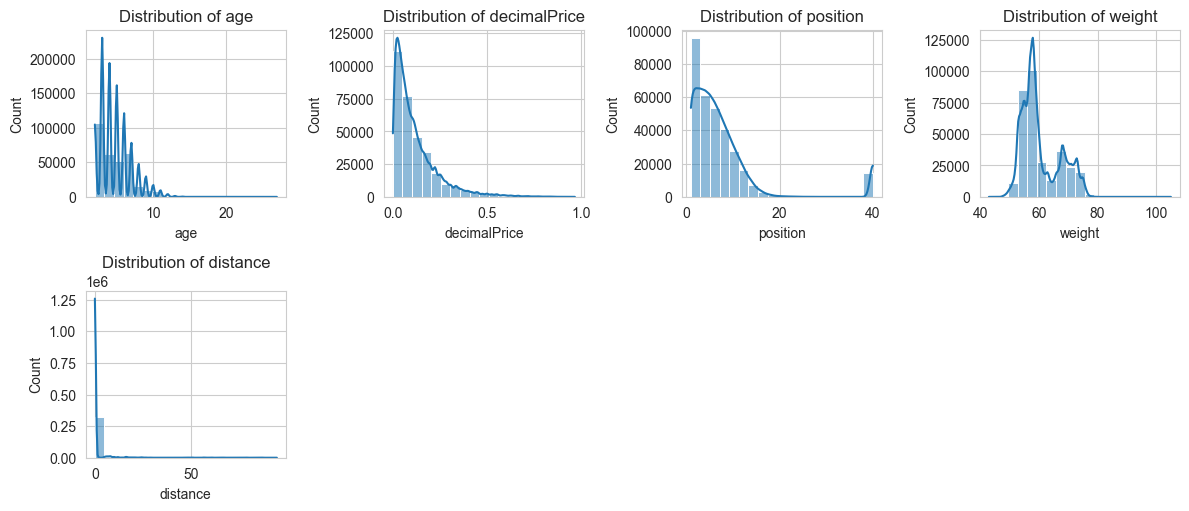

In [64]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    bin = int(1+np.log2(len(num_cols)))
    sns.histplot(data=df,x=df[col],bins=bin,kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## Missing values Imputation of numerical columns: ##

### Since the columns are positively skewed,using median is the right option. ###

In [65]:
num_cols

,age,decimalPrice,position,weight,distance
0,4.0,0.312500,1.0,56.0,0.0
1,6.0,0.333333,2.0,56.0,0.0
2,5.0,0.200000,3.0,57.0,0.0
3,4.0,0.017544,4.0,56.0,0.0
4,5.0,0.090909,5.0,54.0,0.0
...,...,...,...,...,...
353456,NaN,NaN,NaN,NaN,6.0
353458,NaN,NaN,NaN,NaN,10.0
353459,NaN,NaN,NaN,NaN,8.5
353460,NaN,NaN,NaN,NaN,18.0


In [66]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [67]:
df.isna().sum()

horseName        21096
age                  0
decimalPrice         0
isFav            21096
trainerName      21117
jockeyName       21099
position             0
weight               0
res_win          21096
date                 0
rclass          329334
distance             0
countryCode     321128
year                 0
day                  0
month                0
dtype: int64

In [68]:
df['res_win'] = df['res_win'].fillna(df['res_win'].mode()[0])
df['isFav'] = df['isFav'].fillna(df['isFav'].mode()[0])

In [69]:
df.isna().sum()

horseName        21096
age                  0
decimalPrice         0
isFav                0
trainerName      21117
jockeyName       21099
position             0
weight               0
res_win              0
date                 0
rclass          329334
distance             0
countryCode     321128
year                 0
day                  0
month                0
dtype: int64

## Descriptive statistics: ##

In [70]:
df.describe()

,age,decimalPrice,isFav,position,weight,res_win,date,distance,year
count,342224.000000,342224.000000,342224.000000,342224.000000,342224.000000,342224.000000,342224,342224.000000,342224.000000
mean,4.723333,0.116502,0.099040,7.408338,60.261361,0.093433,2011-09-01 17:34:03.798214144,1.165776,2011.280606
min,2.000000,0.001427,0.000000,1.000000,43.000000,0.000000,2001-01-19 00:00:00,0.000000,2001.000000
25%,3.000000,0.038462,0.000000,3.000000,56.000000,0.000000,2011-05-19 00:00:00,0.000000,2011.000000
50%,4.000000,0.083333,0.000000,6.000000,58.000000,0.000000,2011-05-19 00:00:00,0.000000,2011.000000
75%,6.000000,0.153846,0.000000,9.000000,64.000000,0.000000,2011-05-19 00:00:00,0.000000,2011.000000
max,27.000000,0.965517,1.000000,40.000000,105.000000,1.000000,2031-12-19 00:00:00,94.500000,2031.000000
std,2.058446,0.114689,0.298717,7.739986,6.345560,0.291039,NaN,6.475781,2.452842


In [71]:
for col in num_cols:
    print(f"{col} : {df[col].min()}")

age : 2.0
decimalPrice : 0.0014265335235378
position : 1.0
weight : 43.0
distance : 0.0


## Log transformation of numerical columns: ##

In [72]:
for col in skew_cols:
    if df[col].min() < 0:
        df[col] = abs(df[col])
    df[col] = df[col].apply(lambda x: np.log(x+1))

In [73]:
for col in skew_cols:
    print(f"{col} : {(skew(df[col]))}")

decimalPrice : 1.760153377821158
weight : 0.7150631714845378
distance : 4.1302552126336805


In [74]:
for col in num_cols:
    mean_value = df[col].mean()
    median_value = df[col].median()
    if mean_value > median_value:
        print(f"{col} : {'positive_skewed'}")
    elif mean_value<median_value:
        print(f"{col}:{'negative_skewed'}")
    else:
        print(f"{col}:{'Not skewed'}")



age : positive_skewed
decimalPrice : positive_skewed
position : positive_skewed
weight : positive_skewed
distance : positive_skewed


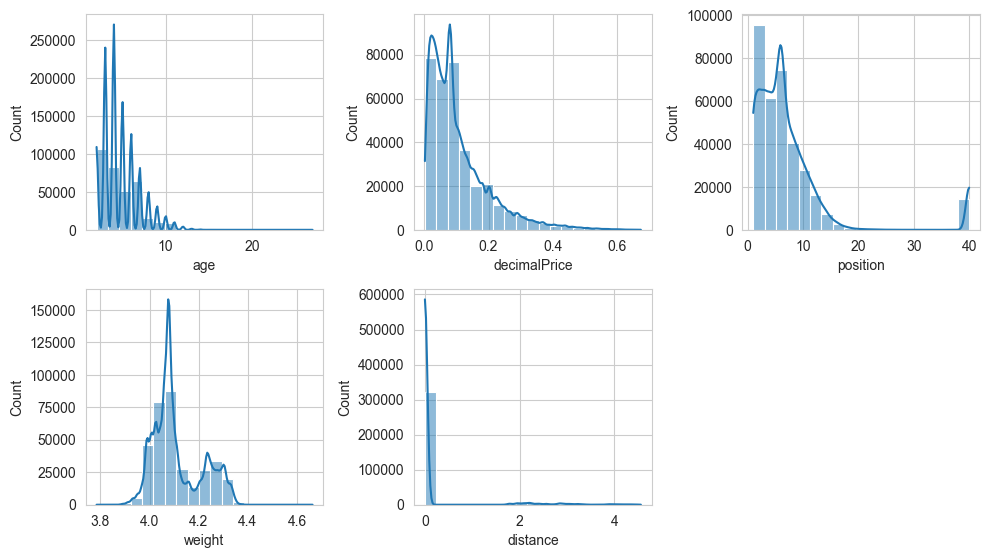

In [75]:
plt.figure(figsize=(10,8))
for i,col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    bins = int(1+np.log2(len(num_cols)))
    sns.histplot(data=df,x=df[col],bins=bins,kde=True)
plt.tight_layout()
plt.show()

In [76]:
df.dtypes

horseName               object
age                    float64
decimalPrice           float64
isFav                  float64
trainerName             object
jockeyName              object
position               float64
weight                 float64
res_win                float64
date            datetime64[ns]
rclass                  object
distance               float64
countryCode             object
year                     int32
day                     object
month                   object
dtype: object

## Datatype conversion: ##

In [77]:
df['age'] = df['age'].astype(int)
df['isFav'] = df['isFav'].astype(int)
df['res_win'] = df['res_win'].astype(int)
df['position'] = df['position'].astype(int)

In [78]:
df.dtypes

horseName               object
age                      int32
decimalPrice           float64
isFav                    int32
trainerName             object
jockeyName              object
position                 int32
weight                 float64
res_win                  int32
date            datetime64[ns]
rclass                  object
distance               float64
countryCode             object
year                     int32
day                     object
month                   object
dtype: object

## Unique values of each column: ##

In [79]:
for col in num_cols:
    print(f"{col}:{df[col].unique()}")

age:[ 4  6  5  3  7  9  8 10 12 14 11 13 15  2 16 17 27]
decimalPrice:[0.27193372 0.28768207 0.18232156 0.01739174 0.08701138 0.00457667
 0.02898754 0.02666825 0.14953173 0.02739897 0.00447428 0.00496279
 0.00350263 0.15656906 0.12516314 0.30538165 0.1221027  0.04255961
 0.12838117 0.03390155 0.03774033 0.04652002 0.49247649 0.20763936
 0.14310084 0.22314355 0.40546511 0.07410797 0.0098523  0.01481509
 0.01941809 0.00660068 0.26826399 0.32277339 0.11778304 0.06453852
 0.13353139 0.2006707  0.05715841 0.10536052 0.31015493 0.16705408
 0.23361485 0.26469255 0.1410786  0.01227009 0.06899287 0.00280505
 0.01069529 0.04082199 0.01360565 0.02985296 0.00851069 0.09531018
 0.35139789 0.08004271 0.4567584  0.02409755 0.25131443 0.11122564
 0.15415068 0.29849299 0.43531807 0.42121347 0.23638878 0.38946477
 0.0317487  0.06062462 0.04879016 0.32016753 0.02469261 0.16989904
 0.24512246 0.00461895 0.00453516 0.00249066 0.00301659 0.0104713
 0.10008346 0.36772478 0.44183275 0.33647224 0.01257878 0.02

In [80]:
df.dtypes

horseName               object
age                      int32
decimalPrice           float64
isFav                    int32
trainerName             object
jockeyName              object
position                 int32
weight                 float64
res_win                  int32
date            datetime64[ns]
rclass                  object
distance               float64
countryCode             object
year                     int32
day                     object
month                   object
dtype: object

## Categorical columns: ##

In [81]:
cat_cols = df.drop(columns=['date','day','month']).select_dtypes(include=object)
cat_cols

,horseName,trainerName,jockeyName,rclass,countryCode
0,Picken,J Size,Joao Moreira,NaN,NaN
1,Noble De Love,F C Lor,Zac Purton,NaN,NaN
2,Fresh Power,Y S Tsui,Silvestre De Sousa,NaN,NaN
3,Happy Hour,C H Yip,Umberto Rispoli,NaN,NaN
4,Super Fun,L Ho,Matthew Poon,NaN,NaN
...,...,...,...,...,...
353456,NaN,NaN,NaN,NaN,AU
353458,NaN,NaN,NaN,NaN,JP
353459,NaN,NaN,NaN,NaN,US
353460,NaN,NaN,NaN,NaN,JP


In [82]:
df.isna().sum()

horseName        21096
age                  0
decimalPrice         0
isFav                0
trainerName      21117
jockeyName       21099
position             0
weight               0
res_win              0
date                 0
rclass          329334
distance             0
countryCode     321128
year                 0
day                  0
month                0
dtype: int64

### Data Distribution in categorical columns: ###

In [83]:
for col in cat_cols:
    most_common = df[col].value_counts(normalize=True).iloc[0]
    print(f"{col} : {most_common}")

horseName : 0.00018684138412097356
trainerName : 0.008489382043991568
jockeyName : 0.007128065395095368
rclass : 0.2835531419705198
countryCode : 0.6113007205157376


In [84]:
for col in cat_cols:
    most_common = df[col].value_counts(normalize=True).iloc[0]
    if most_common > 0.7:
        print(f"{col} :{'Higly_skewed'}")
    elif most_common > 0.5:
        print(f"{col} : {"Dominant"}")
    else:
        print(f"{col} : {'Normally distributed'}")

horseName : Normally distributed
trainerName : Normally distributed
jockeyName : Normally distributed
rclass : Normally distributed
countryCode : Dominant


In [85]:
cat_cols.isna().sum()

horseName       21096
trainerName     21117
jockeyName      21099
rclass         329334
countryCode    321128
dtype: int64

## Null values imputation: ##

In [86]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [87]:
df.isna().sum()

horseName       0
age             0
decimalPrice    0
isFav           0
trainerName     0
jockeyName      0
position        0
weight          0
res_win         0
date            0
rclass          0
distance        0
countryCode     0
year            0
day             0
month           0
dtype: int64

## Outliers Removal ##

In [88]:
num_cols

,age,decimalPrice,position,weight,distance
0,4.0,0.312500,1.0,56.0,0.0
1,6.0,0.333333,2.0,56.0,0.0
2,5.0,0.200000,3.0,57.0,0.0
3,4.0,0.017544,4.0,56.0,0.0
4,5.0,0.090909,5.0,54.0,0.0
...,...,...,...,...,...
353456,NaN,NaN,NaN,NaN,6.0
353458,NaN,NaN,NaN,NaN,10.0
353459,NaN,NaN,NaN,NaN,8.5
353460,NaN,NaN,NaN,NaN,18.0


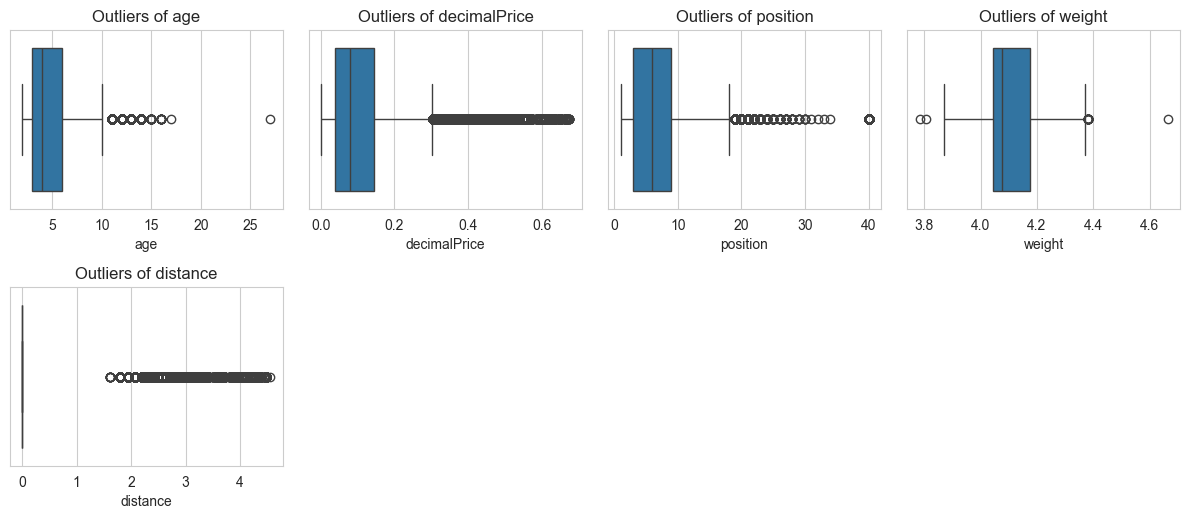

In [89]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col])
    plt.title(f"Outliers of {col}")
plt.tight_layout()
plt.show()
    

In [90]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - 1.5 * iqr
    uf = q3 + 1.5 * iqr
    df[col] = df[(df[col]>lf) | (df[col]<uf)][col]

In [91]:
df = df.reset_index(drop=True)

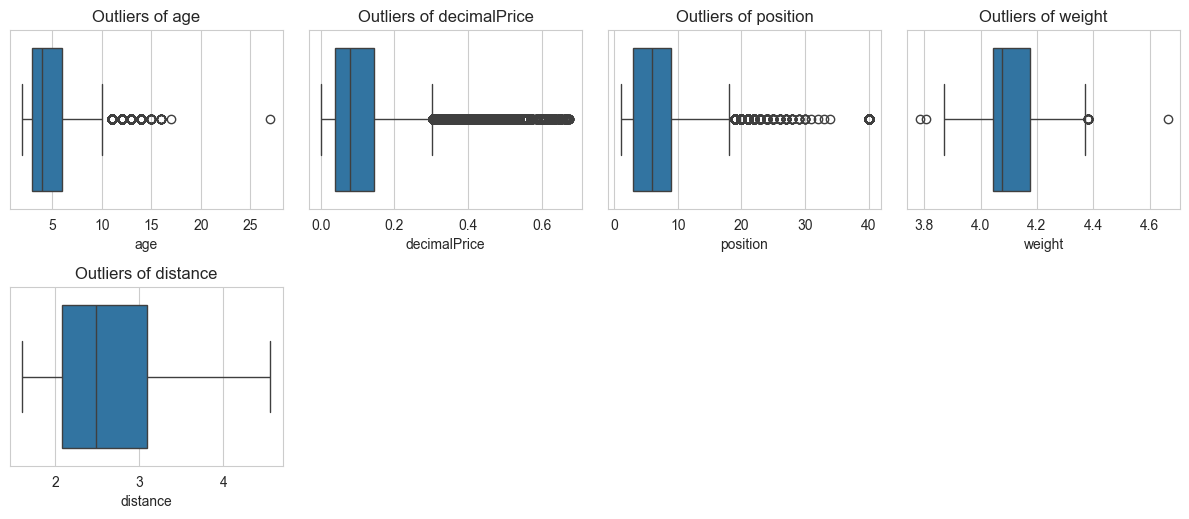

In [92]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col])
    plt.title(f"Outliers of {col}")
plt.tight_layout()
plt.show()
    

### decimal_price,position,,weight,age ###

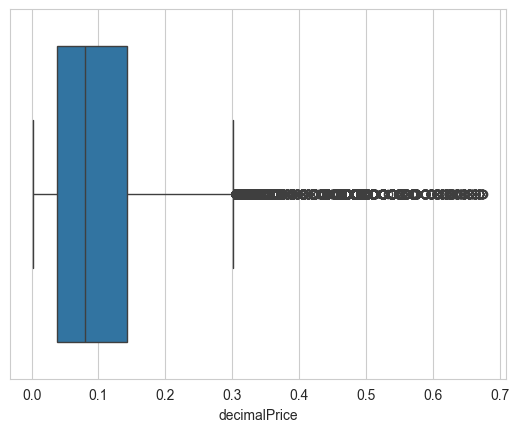

In [93]:
sns.boxplot(x=df['decimalPrice'])
plt.show()

In [94]:
df = df[df['decimalPrice']<0.23]

In [95]:
df =df.reset_index(drop=True)

In [96]:
df['decimalPrice'].unique()

array([0.18232156, 0.01739174, 0.08701138, 0.00457667, 0.02898754,
       0.02666825, 0.14953173, 0.02739897, 0.00447428, 0.00496279,
       0.00350263, 0.15656906, 0.12516314, 0.1221027 , 0.04255961,
       0.12838117, 0.03390155, 0.03774033, 0.04652002, 0.20763936,
       0.14310084, 0.22314355, 0.07410797, 0.0098523 , 0.01481509,
       0.01941809, 0.00660068, 0.11778304, 0.06453852, 0.13353139,
       0.2006707 , 0.05715841, 0.10536052, 0.16705408, 0.1410786 ,
       0.01227009, 0.06899287, 0.00280505, 0.01069529, 0.04082199,
       0.01360565, 0.02985296, 0.00851069, 0.09531018, 0.08004271,
       0.02409755, 0.11122564, 0.15415068, 0.0317487 , 0.06062462,
       0.04879016, 0.02469261, 0.16989904, 0.00461895, 0.00453516,
       0.00249066, 0.00301659, 0.0104713 , 0.10008346, 0.01257878,
       0.02150621, 0.00865806, 0.00643089, 0.02817088, 0.01273903,
       0.08068891, 0.07755823, 0.03636764, 0.17904823, 0.07302514,
       0.02298952, 0.03077166, 0.2135741 , 0.01183446, 0.05129

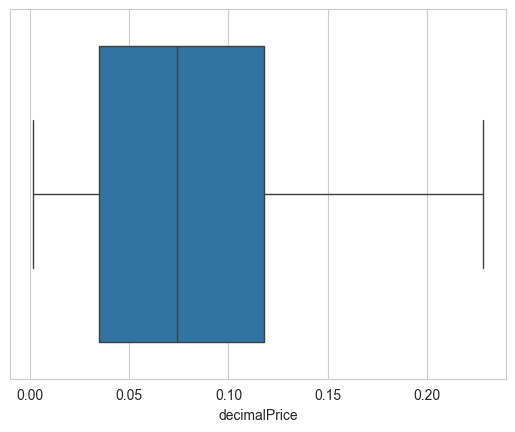

In [97]:
sns.boxplot(x=df['decimalPrice'])
plt.show()

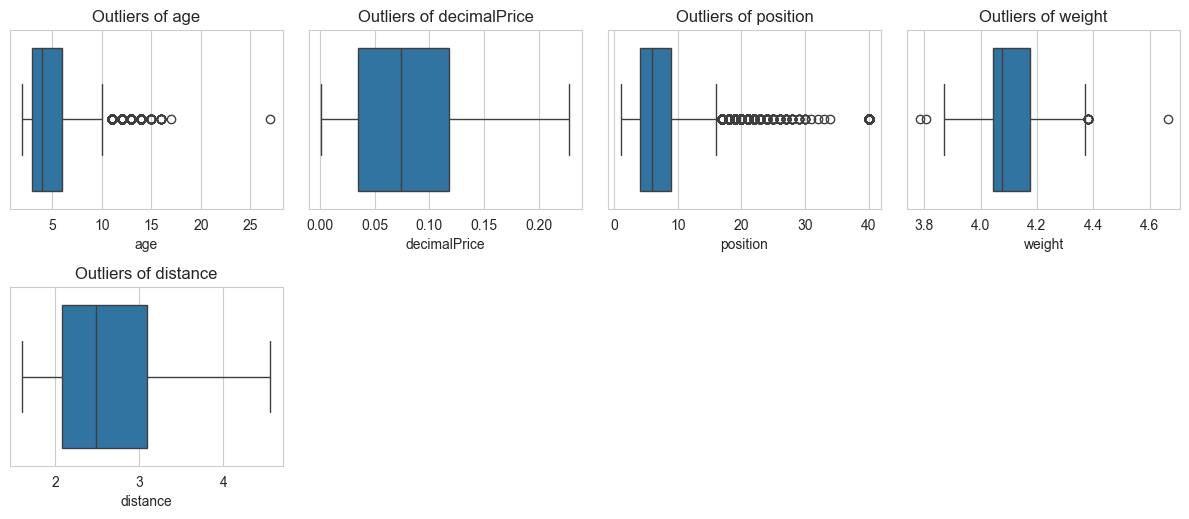

In [98]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col])
    plt.title(f"Outliers of {col}")
plt.tight_layout()
plt.show()
    

In [99]:
df['position'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  1,  2, 40, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

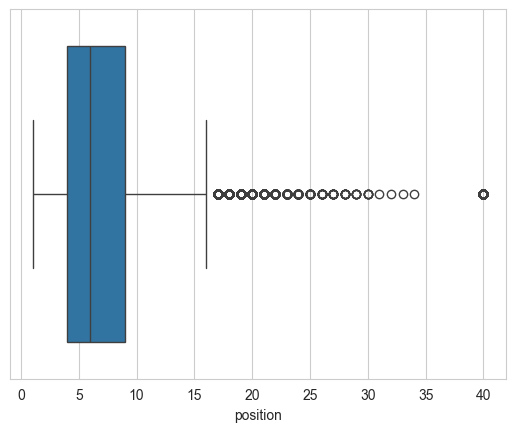

In [100]:
sns.boxplot(x=df['position'])
plt.show()

In [101]:
df = df[df['position']<15]

In [102]:
df =df.reset_index(drop=True)

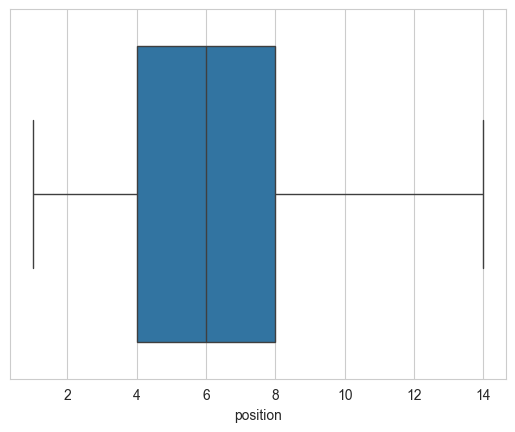

In [103]:
sns.boxplot(x=df['position'])
plt.show()

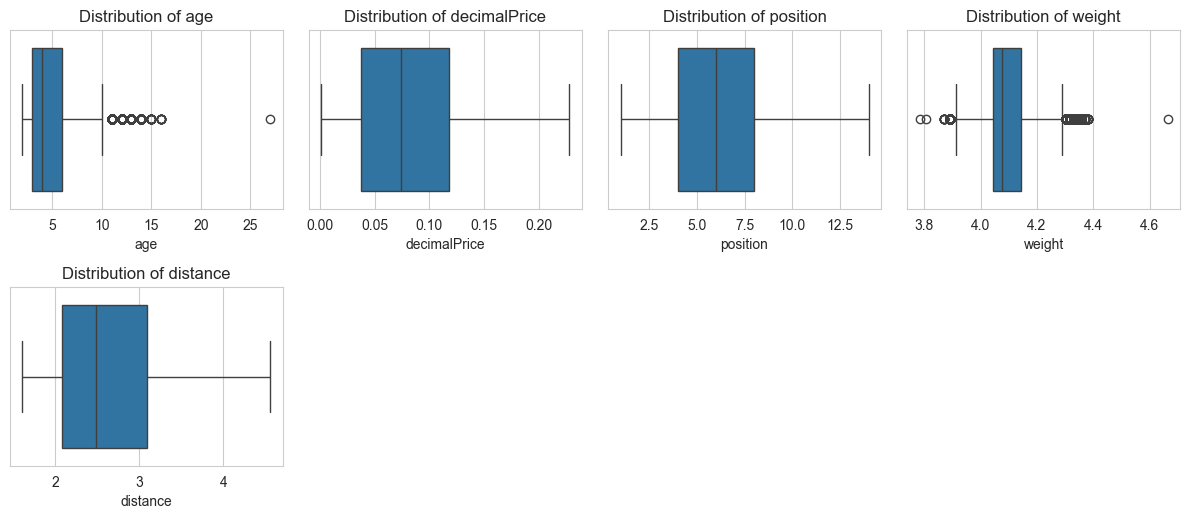

In [104]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col])
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

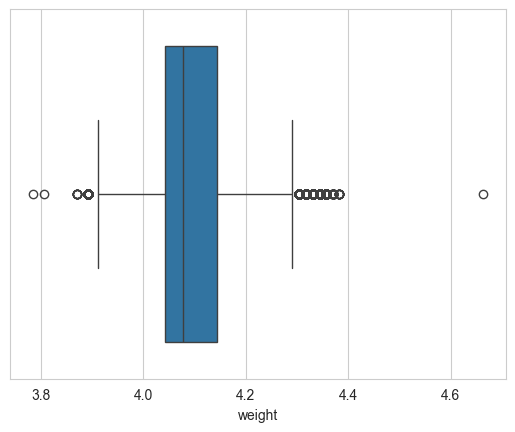

In [105]:
sns.boxplot(x=df['weight'])
plt.show()

In [106]:
df = df[df['weight']>3.95]

In [107]:
df = df[df['weight']<4.15]

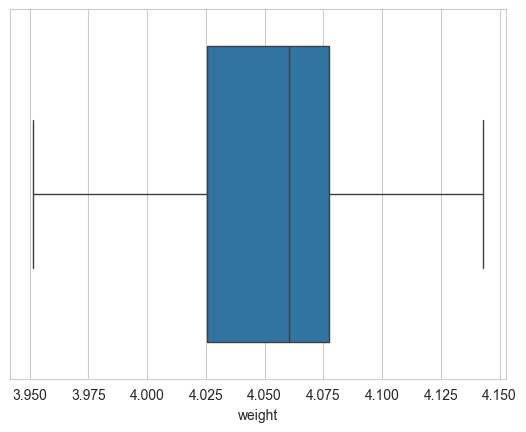

In [108]:
sns.boxplot(x=df['weight'])
plt.show()

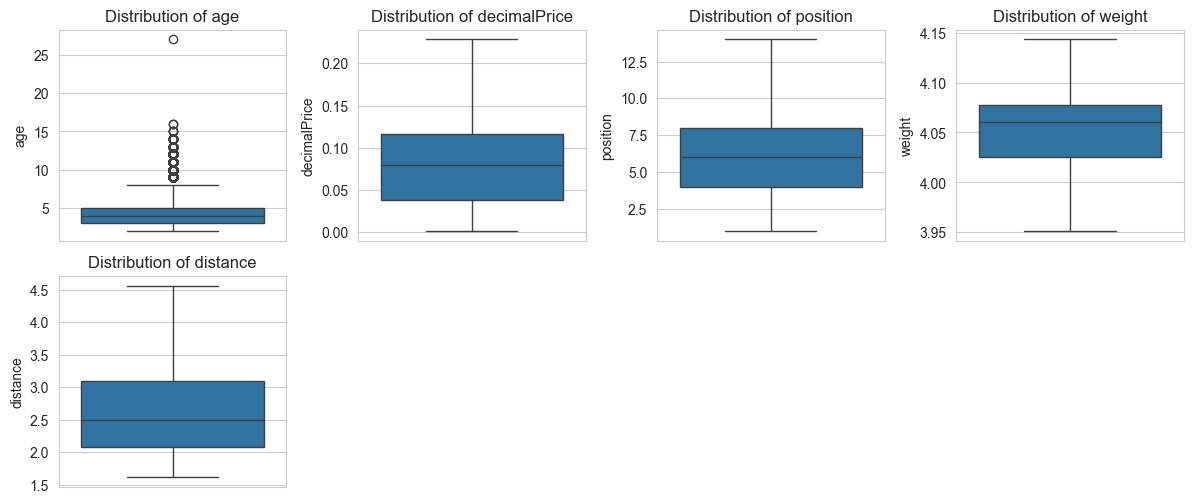

In [109]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(df[col])
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

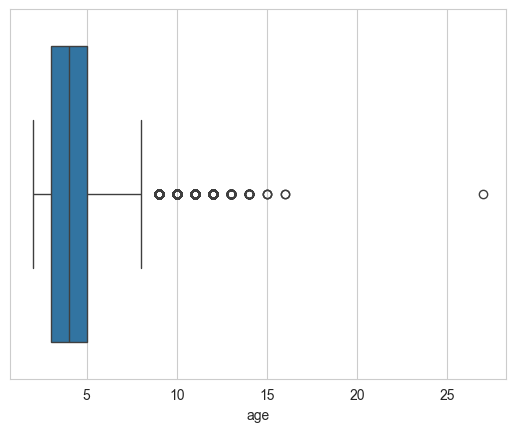

In [110]:
sns.boxplot(x=df['age'])
plt.show()

In [111]:
df['age'].unique()

array([ 5,  4,  3,  6,  7,  9,  8, 10, 11, 13, 12, 14,  2, 16, 15, 27])

In [112]:
df = df[df['age']<9]

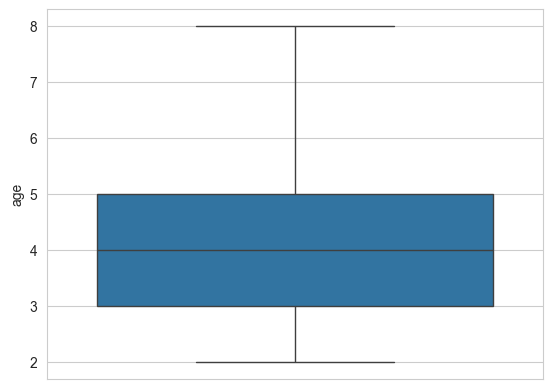

In [113]:
sns.boxplot(df['age'])
plt.show()

## After removal of outliers: ##

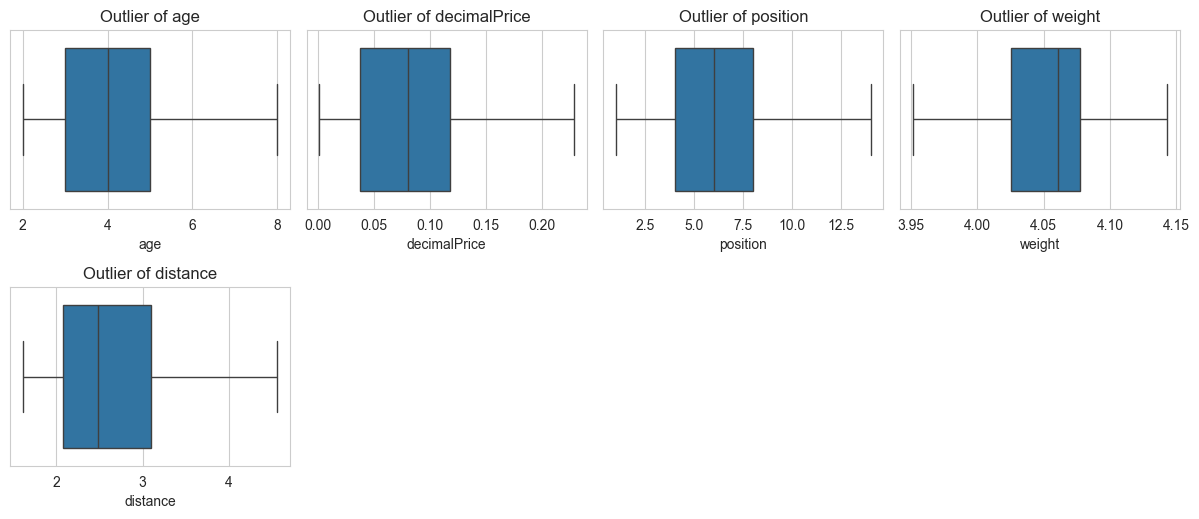

In [114]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col])
    plt.title(f"Outlier of {col}")
plt.tight_layout()
plt.show()

In [115]:
df.isna().sum()

horseName            0
age                  0
decimalPrice         0
isFav                0
trainerName          0
jockeyName           0
position             0
weight               0
res_win              0
date                 0
rclass               0
distance        188625
countryCode          0
year                 0
day                  0
month                0
dtype: int64

In [116]:
df['distance'] = df['distance'].fillna(df['distance'].median())

In [117]:
df.isna().sum()

horseName       0
age             0
decimalPrice    0
isFav           0
trainerName     0
jockeyName      0
position        0
weight          0
res_win         0
date            0
rclass          0
distance        0
countryCode     0
year            0
day             0
month           0
dtype: int64

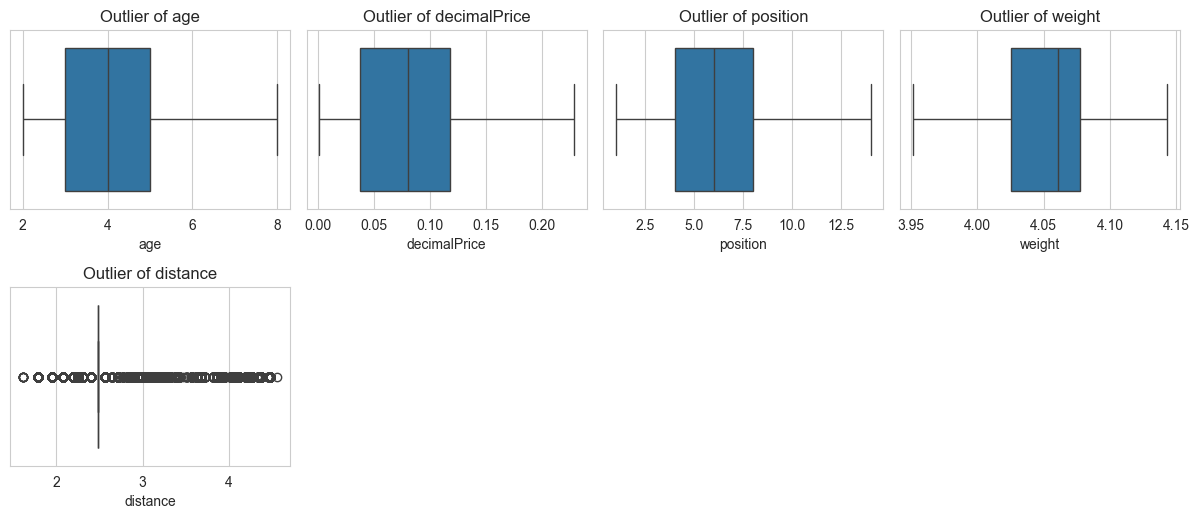

In [118]:
plt.figure(figsize=(12,10))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df,x=df[col])
    plt.title(f"Outlier of {col}")
plt.tight_layout()
plt.show()

In [119]:
df.drop(columns=['distance'],inplace=True)

In [120]:
df.columns

Index(['horseName', 'age', 'decimalPrice', 'isFav', 'trainerName',
       'jockeyName', 'position', 'weight', 'res_win', 'date', 'rclass',
       'countryCode', 'year', 'day', 'month'],
      dtype='object')

In [121]:
df.isna().sum()

horseName       0
age             0
decimalPrice    0
isFav           0
trainerName     0
jockeyName      0
position        0
weight          0
res_win         0
date            0
rclass          0
countryCode     0
year            0
day             0
month           0
dtype: int64

In [122]:
df.dtypes

horseName               object
age                      int32
decimalPrice           float64
isFav                    int32
trainerName             object
jockeyName              object
position                 int32
weight                 float64
res_win                  int32
date            datetime64[ns]
rclass                  object
countryCode             object
year                     int32
day                     object
month                   object
dtype: object

In [123]:
df['weight'] = df['weight'].astype(float)

In [124]:
df.dtypes

horseName               object
age                      int32
decimalPrice           float64
isFav                    int32
trainerName             object
jockeyName              object
position                 int32
weight                 float64
res_win                  int32
date            datetime64[ns]
rclass                  object
countryCode             object
year                     int32
day                     object
month                   object
dtype: object

In [125]:
df['weight'].unique()

array([4.06044301, 4.04305127, 4.00733319, 4.09434456, 3.98898405,
       4.02535169, 3.97029191, 3.95124372, 4.07753744, 4.11087386,
       4.14313473, 4.12713439])

## Rescaling to old values ##

In [126]:
df['weight'] = df['weight']*10

In [127]:
df['weight'].unique()

array([40.60443011, 40.43051268, 40.07333185, 40.94344562, 39.88984047,
       40.25351691, 39.70291914, 39.51243719, 40.77537444, 41.10873864,
       41.43134726, 41.27134385])

In [128]:
df['weight'] = df['weight'].apply(lambda x: f"{x:.2f}")

In [129]:
df['weight'] = df['weight'].astype(float)

In [130]:
df.dtypes

horseName               object
age                      int32
decimalPrice           float64
isFav                    int32
trainerName             object
jockeyName              object
position                 int32
weight                 float64
res_win                  int32
date            datetime64[ns]
rclass                  object
countryCode             object
year                     int32
day                     object
month                   object
dtype: object

In [131]:
df.head()

,horseName,age,decimalPrice,isFav,trainerName,jockeyName,position,weight,res_win,date,rclass,countryCode,year,day,month
0,Fresh Power,5,0.182322,0,Y S Tsui,Silvestre De Sousa,3,40.60,0,2011-05-19,Class 4,GB,2011,Thursday,May
1,Happy Hour,4,0.017392,0,C H Yip,Umberto Rispoli,4,40.43,0,2011-05-19,Class 4,GB,2011,Thursday,May
2,Super Fun,5,0.087011,0,L Ho,Matthew Poon,5,40.07,0,2011-05-19,Class 4,GB,2011,Thursday,May
3,Blizzing Away,3,0.004577,0,P F Yiu,K C Leung,6,40.07,0,2011-05-19,Class 4,GB,2011,Thursday,May
4,Multigogo,5,0.028988,0,A S Cruz,Alberto Sanna,7,40.94,0,2011-05-19,Class 4,GB,2011,Thursday,May


## Encoding: ##

In [132]:
df['res_win'] = df['res_win'].map({0:'Lost',1:"Win"})

In [133]:
df['res_win'].unique()

array(['Lost', 'Win'], dtype=object)

In [134]:
df['res_win'].value_counts()

res_win
Lost    195944
Win      13777
Name: count, dtype: int64

## Count of win and Lost: ##

## Total count of win and lost ##

In [135]:
def target_count(df):
    return df['res_win'].value_counts().reset_index()

In [136]:
target_count(df)

,res_win,count
0,Lost,195944
1,Win,13777


In [137]:
def total_count(df):
    with sns.color_palette("dark:#5A9_r"):
        fig = sns.countplot(df,x='res_win')
        fig.bar_label(container=fig.containers[0])
        fig.bar_label(container=fig.containers[0])
        return fig

<Axes: xlabel='res_win', ylabel='count'>

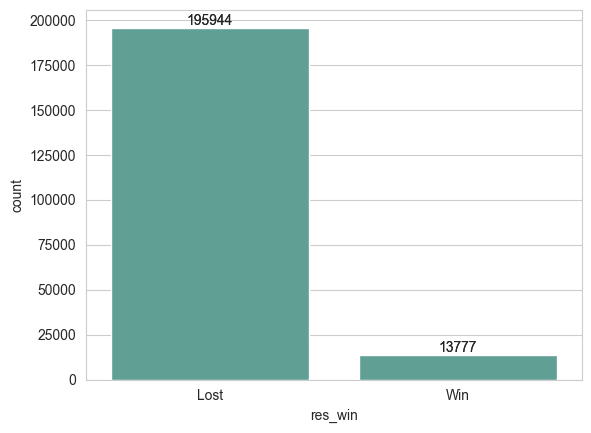

In [138]:
total_count(df)

In [139]:
def total_count_pie(df):
    fig = df['res_win'].value_counts().plot(kind='pie',autopct ="%.2f")
    return fig

<Axes: ylabel='count'>

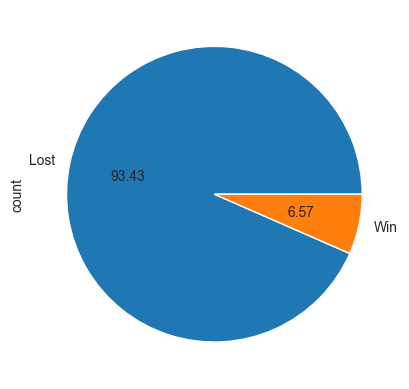

In [140]:
total_count_pie(df)

## Time series Anlaysis ##

## Year wise win/lost distribution ##

In [141]:
def year_analysis(df):
    return df[['year','res_win']].value_counts().reset_index()

In [142]:
year_analysis(df)

,year,res_win,count
0,2011,Lost,175552
1,2011,Win,13777
2,2001,Lost,761
3,2021,Lost,755
4,2007,Lost,749
5,2014,Lost,748
6,2002,Lost,745
7,2005,Lost,743
8,2026,Lost,714
9,2022,Lost,714


In [143]:
def year_dist(df):
    fig = sns.countplot(df,x='year',hue='res_win')
    plt.xticks(rotation=90)
    plt.title('Yearwise win/lost')
    return fig

<Axes: title={'center': 'Yearwise win/lost'}, xlabel='year', ylabel='count'>

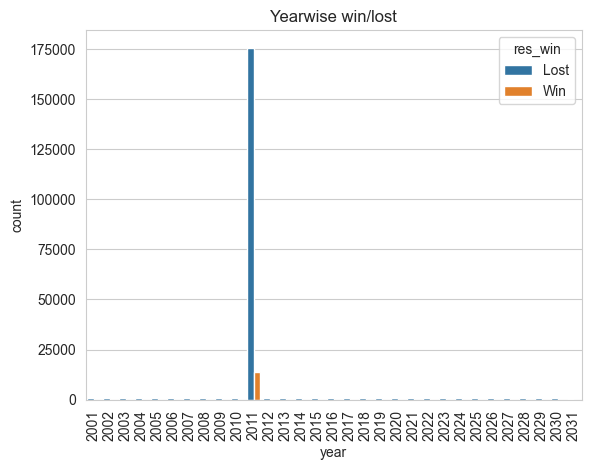

In [144]:
year_dist(df)

## Monthwise win/lost distribution ##

In [145]:
def month_analysis(df):
    return df[['month','res_win']].value_counts().reset_index()

In [146]:
month_analysis(df)

,month,res_win,count
0,May,Lost,176508
1,May,Win,13777
2,October,Lost,2273
3,June,Lost,2103
4,September,Lost,2083
5,August,Lost,2063
6,July,Lost,2042
7,November,Lost,2017
8,January,Lost,1658
9,March,Lost,1593


In [147]:
def month_dist(df):
    fig = sns.countplot(df,x='month',hue='res_win')
    fig.bar_label(container=fig.containers[0])
    fig.bar_label(container=fig.containers[1])
    plt.xticks(rotation=90)
    plt.title('Monthwise win/lost')
    return fig

<Axes: title={'center': 'Monthwise win/lost'}, xlabel='month', ylabel='count'>

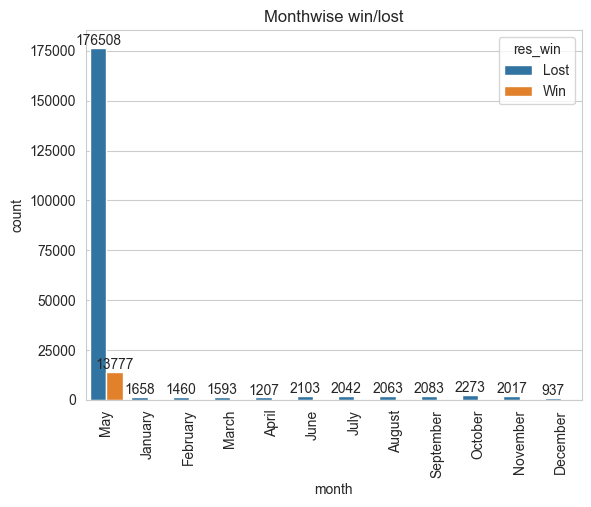

In [148]:
month_dist(df)

## Daywise win/lost distribution ##

In [149]:
def day_analysis(df):
    return df[['day','res_win']].value_counts().reset_index()

In [150]:
day_analysis(df)

,day,res_win,count
0,Thursday,Lost,177713
1,Thursday,Win,13777
2,Tuesday,Lost,3209
3,Saturday,Lost,3060
4,Monday,Lost,3044
5,Wednesday,Lost,3007
6,Friday,Lost,2990
7,Sunday,Lost,2921


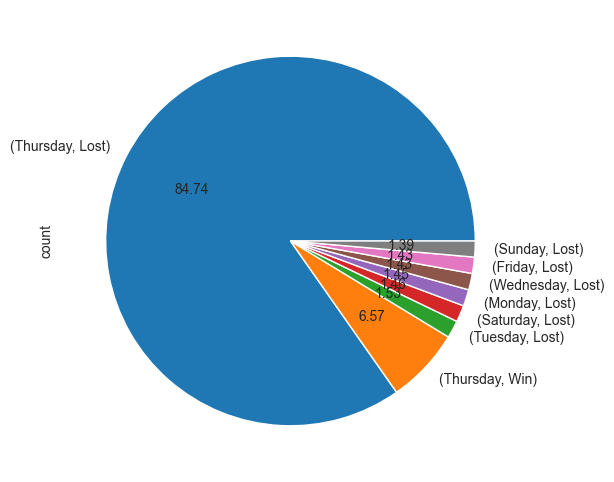

In [151]:
plt.figure(figsize=(8,6))
df[['day','res_win']].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [152]:
def day_dist(df):
    fig = sns.countplot(df,x='day',hue='res_win')
    plt.xticks(rotation=90)
    plt.title('Daywise win/lost')
    return fig

<Axes: title={'center': 'Daywise win/lost'}, xlabel='day', ylabel='count'>

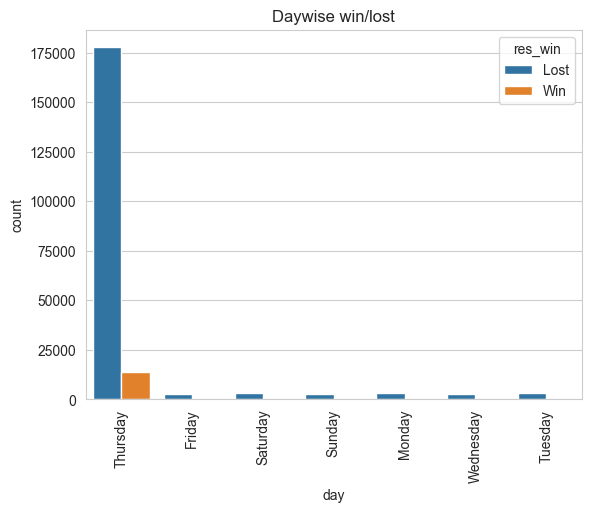

In [153]:
day_dist(df)

## Age distribution for win/lost ##

In [154]:
def age_dist_df(df):
    return df[['res_win','age']]

In [155]:
age_dist_df(df)

,res_win,age
0,Lost,5
1,Lost,4
2,Lost,5
3,Lost,3
4,Lost,5
...,...,...
287386,Lost,4
287387,Lost,4
287388,Lost,4
287389,Lost,4


In [156]:
def age_dist(df):
    fig = sns.boxplot(x='age',y='res_win',data=df)
    plt.xticks(rotation=90)
    plt.xlabel('Age')
    plt.ylabel('Win/Lost')
    plt.title("Age distribution")
    plt.tight_layout()
    return fig

<Axes: title={'center': 'Age distribution'}, xlabel='Age', ylabel='Win/Lost'>

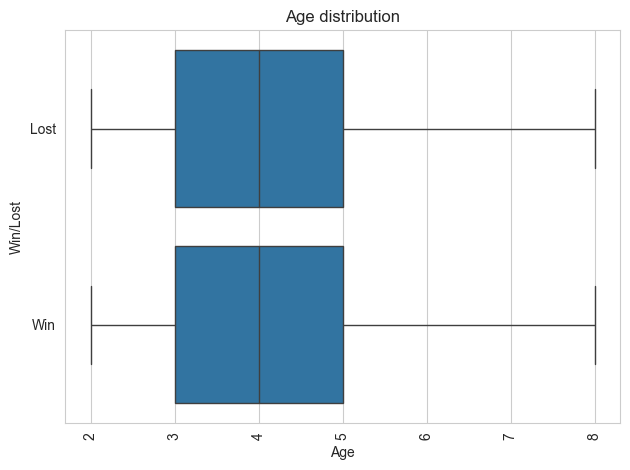

In [157]:
age_dist(df)

### Age  distribution lies between 3 to 5 for both win and lost ###

## Average age ##

In [158]:
def avg_dge_df(df):
    avg_age = df.groupby('res_win').agg({'age':'mean'}).reset_index()
    avg_age.rename(columns={'age':'average_age'},inplace=True)
    return avg_age

In [159]:
avg_dge_df(df)

,res_win,average_age
0,Lost,4.007303
1,Win,3.980112


In [160]:
df.groupby('res_win').agg({'age':['mean','median']}).reset_index()

res_win       age       
               mean median
0    Lost  4.007303    4.0
1     Win  3.980112    4.0

In [161]:
df.groupby('res_win')['age'].mean()

res_win
Lost    4.007303
Win     3.980112
Name: age, dtype: float64

In [162]:

def avg_age_pie(df):
    return df.groupby('res_win')['age'].mean().plot(kind='pie',autopct='%.2f')


<Axes: ylabel='age'>

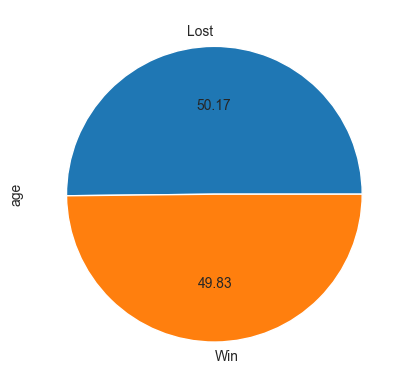

In [163]:
avg_age_pie(df)

In [164]:
def avg_age(df):
    avg_age = df.groupby('res_win').agg({'age':'mean'}).reset_index()
    fig = avg_age.plot(kind='bar',color='skyblue')
    plt.xlabel('Age')
    plt.title('Avearge Age')
    return fig

<Axes: title={'center': 'Avearge Age'}, xlabel='Age'>

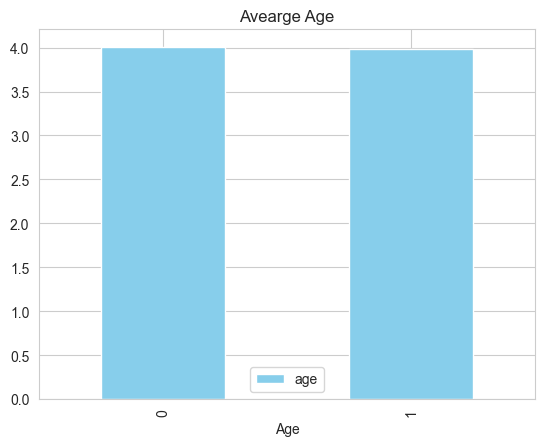

In [165]:
avg_age(df)

In [166]:
def avg_ag_df(df):
    avg_age = df.groupby('res_win').agg({'age':'mean'}).reset_index()
    return avg_age

In [167]:
avg_ag_df(df)

,res_win,age
0,Lost,4.007303
1,Win,3.980112


### Winning horses average age : 3.9 ###
### Loosing horses average age : 4.00 ###

## Minimum and Maximum age ##

In [168]:
def age_range(df):
    fig = df['age'].agg(['min','max']).plot(kind='bar',color='skyblue')
    plt.xlabel("Age")
    plt.title('Minimum & Maximum Age')
    return fig

<Axes: title={'center': 'Minimum & Maximum Age'}, xlabel='Age'>

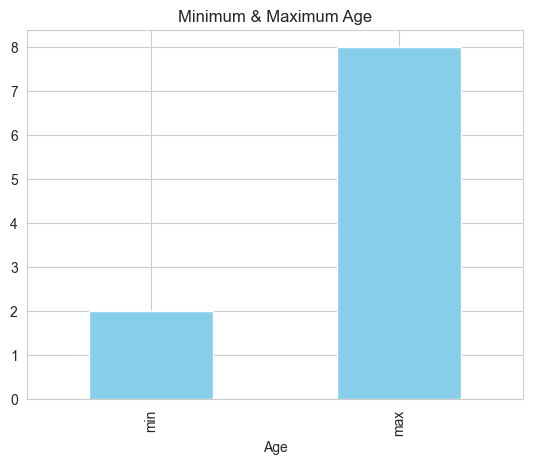

In [169]:
age_range(df)

In [170]:
df[df['res_win'] == 'Win']['age'].agg(['min','max'])

min    2
max    8
Name: age, dtype: int32

In [171]:
df[df['res_win'] == 'Lost']['age'].agg(['min','max'])

min    2
max    8
Name: age, dtype: int32

In [172]:
def age_range_df(df):
    return df[['res_win','age']].agg(['min','max']).reset_index(drop=True)

In [173]:
age_range_df(df)

,res_win,age
0,Lost,2
1,Win,8


### Minimum age : 2 ###

### Maximum age : 8 ###


## Win/lost distribution based on age ##

In [174]:
def age_target_dist(df):
    return df.groupby('res_win')['age'].value_counts().reset_index().sort_values(by='age',ascending=True)

In [175]:
age_target_dist(df)

,res_win,age,count
2,Lost,2,26224
10,Win,2,1992
1,Lost,3,54312
7,Win,3,4319
0,Lost,4,58918
8,Win,4,3075
3,Lost,5,25266
9,Win,5,2116
4,Lost,6,16150
11,Win,6,1240


In [176]:
def outcome_on_age(df):
    pivot_df = df.pivot_table(index='age',columns='res_win',aggfunc='size',fill_value=0)
    ax = pivot_df.plot(kind='bar',color=['blue','orange'],figsize=(10,8))
    ax.set_title("win/lost distribution based on age")
    ax.set_xlabel('Age')
    ax.set_ylabel('count')
    ax.legend(title='Outcome')
    return ax

<Axes: title={'center': 'win/lost distribution based on age'}, xlabel='Age', ylabel='count'>

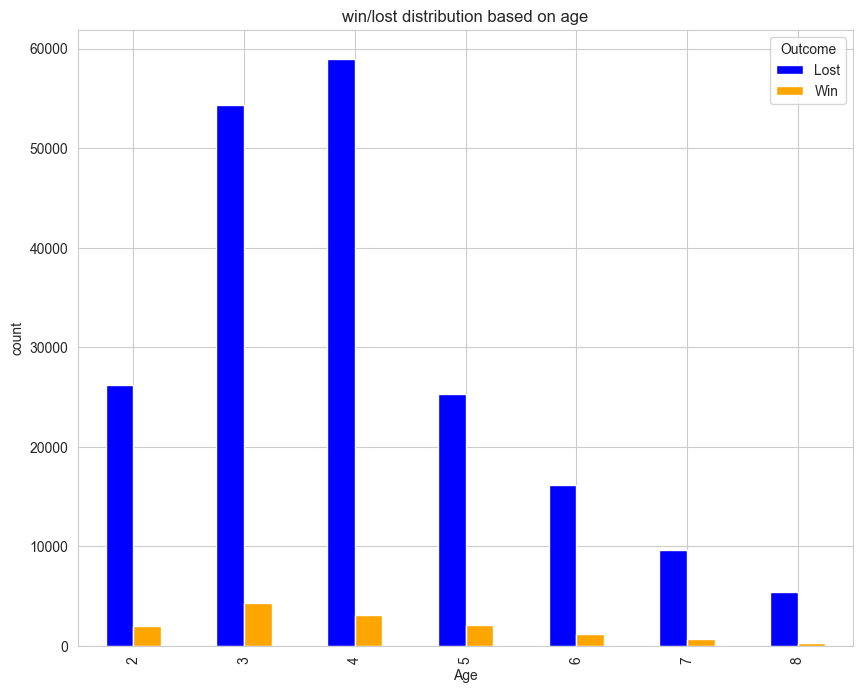

In [177]:
outcome_on_age(df)

## Winning frequency as per Age ##

In [178]:
def win_frq_age(df):
    return df.groupby('age')['res_win'].value_counts().reset_index()

In [179]:
win_frq_age(df)

,age,res_win,count
0,2,Lost,26224
1,2,Win,1992
2,3,Lost,54312
3,3,Win,4319
4,4,Lost,58918
5,4,Win,3075
6,5,Lost,25266
7,5,Win,2116
8,6,Lost,16150
9,6,Win,1240


In [180]:
def win_freq_age(df):
    fig = sns.countplot(data=df,x='age',hue='res_win')
    plt.xlabel('Age')
    plt.ylabel('win/lost count')
    plt.title('Winning frequency as per age')
    plt.tight_layout()
    return fig

<Axes: title={'center': 'Winning frequency as per age'}, xlabel='Age', ylabel='win/lost count'>

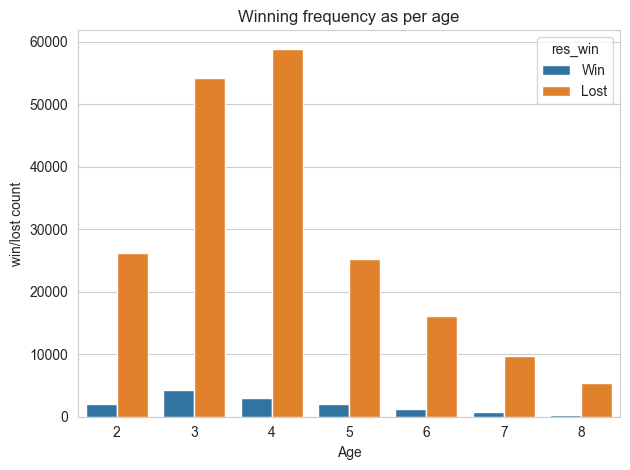

In [181]:
win_freq_age(df)

## Weight distribution to win/lost  ##

In [182]:
def get_wt_dist(df):
    wt_dist = df[['weight','res_win']].value_counts().reset_index()
    wt_dist.drop(columns=['count'],inplace=True)
    return wt_dist


In [183]:
get_wt_dist(df)

,weight,res_win
0,40.78,Lost
1,40.60,Lost
2,40.94,Lost
3,40.25,Lost
4,40.07,Lost
5,39.89,Lost
6,40.43,Lost
7,41.11,Lost
8,41.27,Lost
9,39.70,Lost


In [184]:
def weight_distribution(df):
    fig = sns.boxplot(x='weight',y='res_win',data=df)
    plt.xticks(rotation = 90)
    plt.xlabel('Weights')
    plt.ylabel('win/lost')
    plt.title('Weight distribution for win/lost')
    plt.tight_layout()
    return fig

<Axes: title={'center': 'Weight distribution for win/lost'}, xlabel='Weights', ylabel='win/lost'>

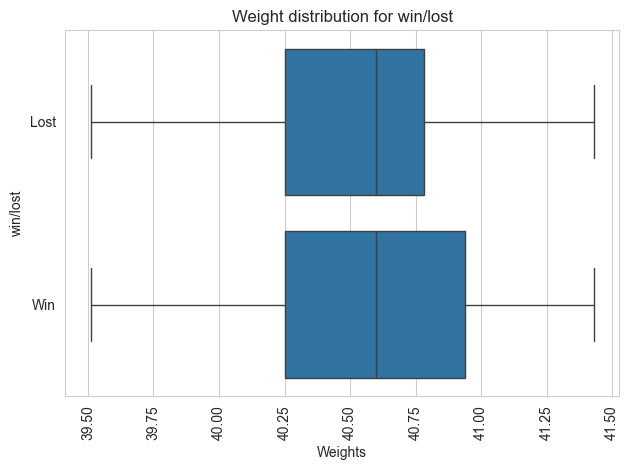

In [185]:
weight_distribution(df)

### For lost - weight distribution lies between 40.25 to 40.75. ###
### For win - weight distribution lies between 40.25 to 40.90 ###

In [186]:
def wt_dist_pivot(df):
    pivot_df = df.pivot_table(index='weight',columns='res_win',aggfunc='size',fill_value=0)
    ax = pivot_df.plot(kind='bar',color=['blue','orange'],figsize=(10,8))
    ax.set_title("win/lost distribution based on weight")
    ax.set_xlabel('Weight')
    ax.set_ylabel('count')
    ax.legend(title='Outcome')
    return ax

<Axes: title={'center': 'win/lost distribution based on weight'}, xlabel='Weight', ylabel='count'>

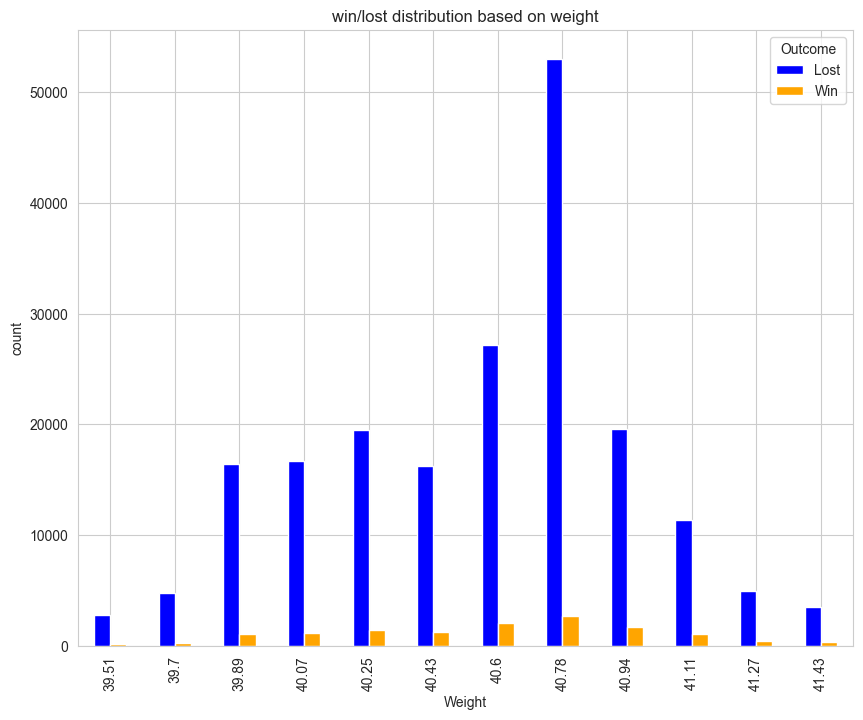

In [187]:
wt_dist_pivot(df)

## Weight distribution to win/lost percentage ##

In [188]:
def weight_dist_percent(df):
    wt_count = df.groupby('weight')['res_win'].value_counts(normalize=True).reset_index()
    return wt_count

In [189]:
weight_dist_percent(df)

,weight,res_win,proportion
0,39.51,Lost,0.953216
1,39.51,Win,0.046784
2,39.70,Lost,0.942762
3,39.70,Win,0.057238
4,39.89,Lost,0.937439
5,39.89,Win,0.062561
6,40.07,Lost,0.933606
7,40.07,Win,0.066394
8,40.25,Lost,0.932375
9,40.25,Win,0.067625


In [190]:
def wt_to_win(df):
    wt_count = df.groupby('weight')['res_win'].value_counts(normalize=True).reset_index()
    plt.figure(figsize=(8,6))
    fig = sns.barplot(wt_count,x='weight',y='proportion',hue='res_win')
    plt.ylabel('Winning_percentage')
    plt.title('Weight distibution to the winning_percentage')
    return fig

<Axes: title={'center': 'Weight distibution to the winning_percentage'}, xlabel='weight', ylabel='Winning_percentage'>

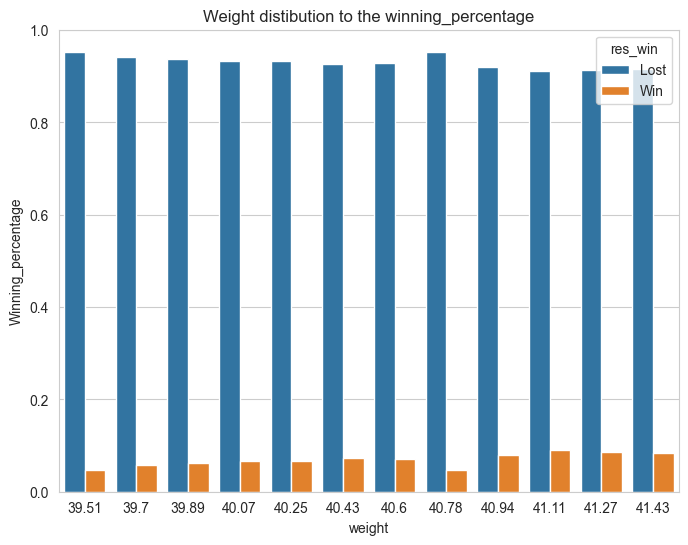

In [191]:
wt_to_win(df)

## Winning_weight disribution ##

In [192]:
def win_wt_dist(df):
    wt_count = df[df['res_win'] == 'Win']['weight'].value_counts().reset_index().sort_values(by='count',ascending=True)
    return wt_count

In [193]:
win_wt_dist(df)

,weight,count
11,39.51,136
10,39.70,291
9,41.43,327
8,41.27,465
7,39.89,1098
6,41.11,1117
5,40.07,1185
4,40.43,1287
3,40.25,1412
2,40.94,1717


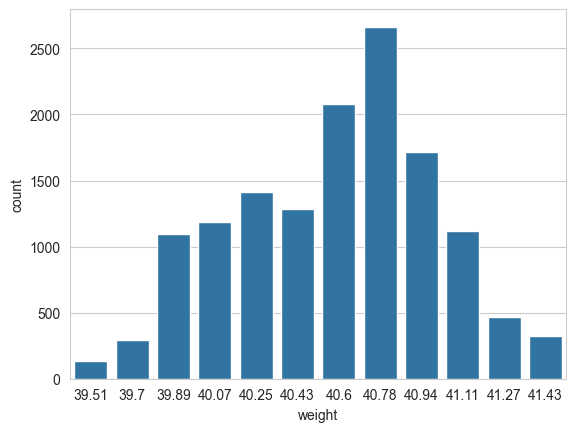

In [194]:
wt_count = df[df['res_win'] == 'Win']['weight'].value_counts().reset_index().sort_values(by='count',ascending=True)
sns.barplot(wt_count,x='weight',y='count')
plt.show()

In [195]:
def win_weight_dist(df):
    wt_count = df[df['res_win'] == 'Win']['weight'].value_counts().reset_index().sort_values(by='count',ascending=True)
    plt.figure(figsize=(8,6))
    fig = sns.lineplot(wt_count,x='weight',y='count')
    plt.ylabel('Winning_weight_range')
    plt.title('Winning_weight distribution')
    return fig

<Axes: title={'center': 'Winning_weight distribution'}, xlabel='weight', ylabel='Winning_weight_range'>

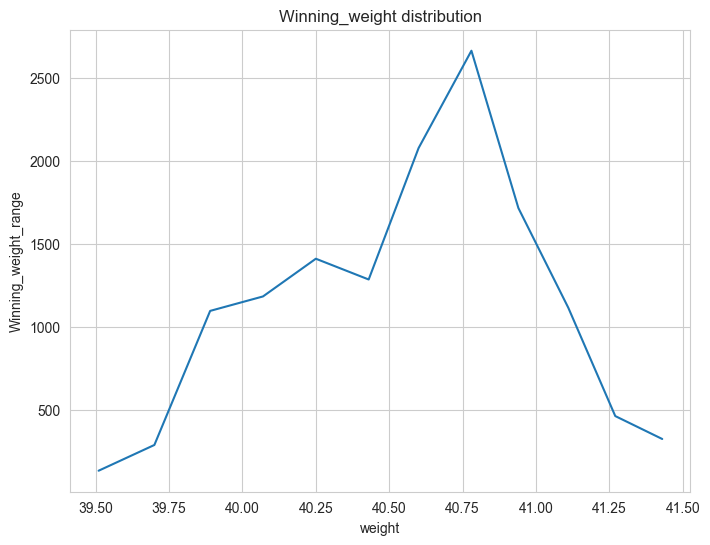

In [196]:
win_weight_dist(df)

## Lost weight distribution ##

In [197]:

def lost_wt_dist(df):
    lost_wt = df[df['res_win'] == 'Lost']['weight'].value_counts().reset_index().sort_values(by='count',ascending=True)
    return lost_wt

In [198]:
lost_wt_dist(df)

,weight,count
11,39.51,2771
10,41.43,3526
9,39.70,4793
8,41.27,4933
7,41.11,11350
6,40.43,16271
5,39.89,16453
4,40.07,16663
3,40.25,19468
2,40.94,19584


In [199]:
def lost_weight_dist(df):
    lost_wt = df[df['res_win'] == 'Lost']['weight'].value_counts().reset_index().sort_values(by='count',ascending=True)
    fig,ax=plt.subplots(figsize=(10,8))
    sns.lineplot(lost_wt,x='weight',y='count')
    plt.ylabel('Lossing weight range')
    plt.title('Lost weight distribution')
    plt.close(fig)
    return fig

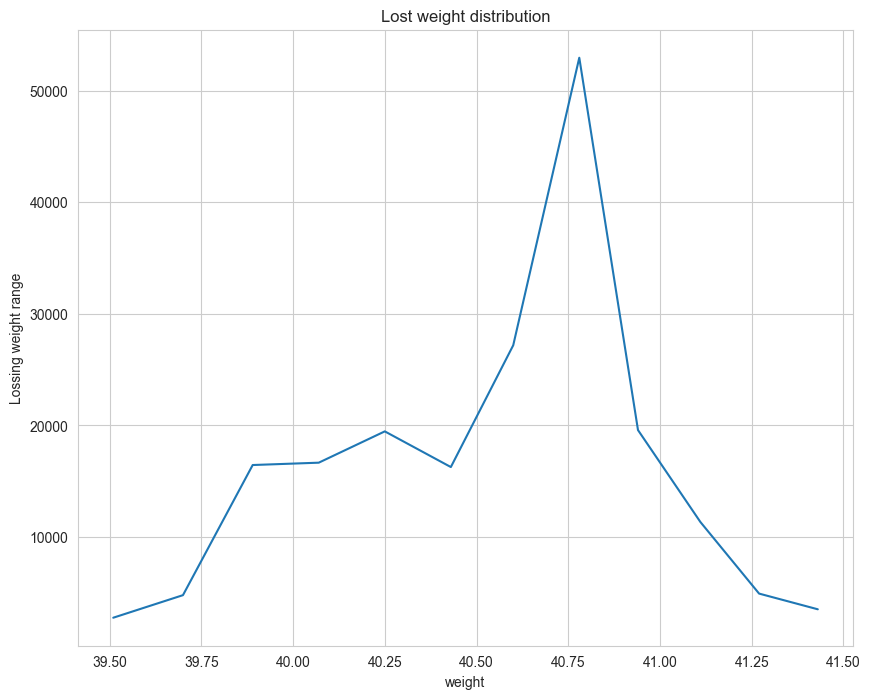

In [200]:
lost_weight_dist(df)

In [201]:
df.head(2)

,horseName,age,decimalPrice,isFav,trainerName,jockeyName,position,weight,res_win,date,rclass,countryCode,year,day,month
0,Fresh Power,5,0.182322,0,Y S Tsui,Silvestre De Sousa,3,40.60,Lost,2011-05-19,Class 4,GB,2011,Thursday,May
1,Happy Hour,4,0.017392,0,C H Yip,Umberto Rispoli,4,40.43,Lost,2011-05-19,Class 4,GB,2011,Thursday,May


## Classwise winning frequency ##

In [202]:
df.groupby('rclass')['res_win'].value_counts().reset_index().sort_values(by='count',ascending=False)

,rclass,res_win,count
3,Class 4,Lost,186709
4,Class 4,Win,13777
5,Class 5,Lost,3542
6,Class 6,Lost,2042
2,Class 3,Lost,1819
1,Class 2,Lost,1045
0,Class 1,Lost,735
7,Class 7,Lost,52


In [203]:
def class_win_freq(df):
    return df.groupby('rclass')['res_win'].value_counts().reset_index().sort_values(by='count',ascending=False)

In [204]:
class_win_freq(df)

,rclass,res_win,count
3,Class 4,Lost,186709
4,Class 4,Win,13777
5,Class 5,Lost,3542
6,Class 6,Lost,2042
2,Class 3,Lost,1819
1,Class 2,Lost,1045
0,Class 1,Lost,735
7,Class 7,Lost,52


In [205]:
def classwise_win(df):
    fig = sns.countplot(data=df,x='rclass',hue='res_win')
    plt.xlabel('class_type')
    plt.ylabel('win/lost count')
    plt.title('Classwise winning frequency')
    plt.tight_layout()
    return fig

<Axes: title={'center': 'Classwise winning frequency'}, xlabel='class_type', ylabel='win/lost count'>

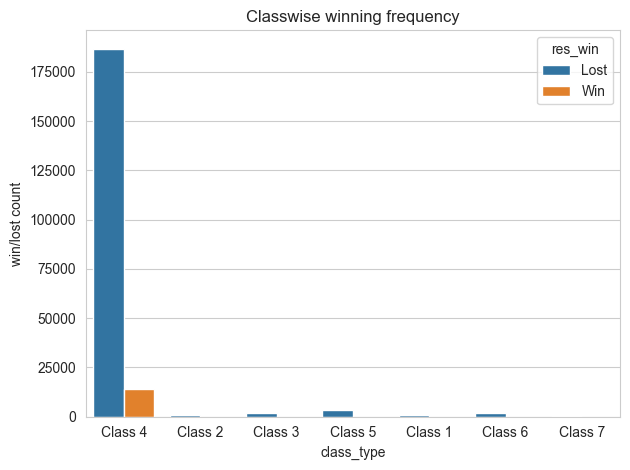

In [206]:
classwise_win(df)

## Horses and their position ##

In [207]:
def horses_position(df):
    post = df.groupby('horseName')['position'].value_counts().reset_index().sort_values(by='count',ascending=False)
    return post

In [208]:
horses_position(df)

,horseName,position,count
102982,Red Stripes,6,21099
24801,Comeatchoo,4,9
108492,Samovar,4,9
108491,Samovar,2,9
116931,Something Lucky,2,9
...,...,...,...
53740,Headman,6,1
53739,Headman,5,1
53738,Headman,1,1
53737,Headline Joe,13,1


## Top 10 Horses which attained  no:1 position and its count ##

In [209]:
def top_10_horses(df):
    top_10 = df[df['position'] == 1]['horseName'].value_counts().nlargest(10).reset_index()
    top_10.rename(columns={'horseName':'Horsenames','count':'Count'},inplace=True)
    return top_10

In [210]:
top_10_horses(df)

,Horsenames,Count
0,Red Stripes,8
1,Trois Mille,7
2,Muraaqeb,7
3,Colony Queen,7
4,Tarnawa,7
5,Air De Valse,6
6,Dawn Breaking,6
7,Glan Y Gors,6
8,Street Poet,6
9,Hidden Spirit,5


In [211]:
def top_10_plot(df):
    top_10 = df[df['position'] == 1]['horseName'].value_counts().nlargest(10).reset_index()
    fig = top_10.plot(kind='bar',color='skyblue')
    plt.xlabel('Horse_names')
    plt.ylabel('position_count')
    plt.title('Top 10 Horses which attained no:1 position and its count')
    return fig
    

<Axes: title={'center': 'Top 10 Horses which attained no:1 position and its count'}, xlabel='Horse_names', ylabel='position_count'>

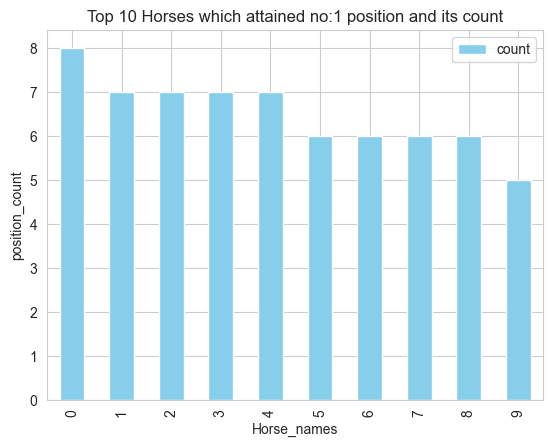

In [212]:
top_10_plot(df)

## Top 10 bottom Horses which attained last position ##

In [213]:
def bottom_10(df):
    bottom_10 = df[df['position'] == 14]['horseName'].value_counts().nlargest(10).reset_index()
    bottom_10.rename(columns={'horseName':'Horsenames','count':'Count'},inplace=True)
    return bottom_10


In [214]:
bottom_10(df)

,Horsenames,Count
0,Marobob,4
1,Larno,4
2,Maltese Apogee,4
3,So Glorious,4
4,Laos Enlightenment,4
5,Dirchill,4
6,Ancient Astronaut,4
7,Smiling Success,3
8,Gold Win,3
9,Dolphin Vista,3


In [215]:
def bottom_10_plot(df):
    bottom_10 = df[df['position'] == 14]['horseName'].value_counts().nlargest(10).reset_index()
    fig = bottom_10.plot(kind='bar',color='skyblue')
    plt.xlabel('Horse_names')
    plt.ylabel('position_count')
    plt.title('Top bottom horses which attained last position and its count')
    return fig

<Axes: title={'center': 'Top bottom horses which attained last position and its count'}, xlabel='Horse_names', ylabel='position_count'>

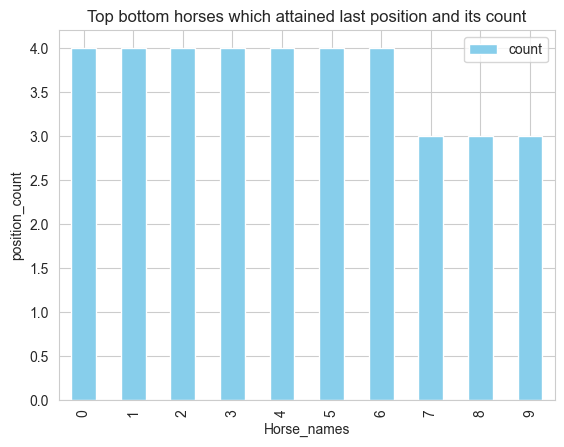

In [216]:
bottom_10_plot(df)

In [217]:
df.head(2)

,horseName,age,decimalPrice,isFav,trainerName,jockeyName,position,weight,res_win,date,rclass,countryCode,year,day,month
0,Fresh Power,5,0.182322,0,Y S Tsui,Silvestre De Sousa,3,40.60,Lost,2011-05-19,Class 4,GB,2011,Thursday,May
1,Happy Hour,4,0.017392,0,C H Yip,Umberto Rispoli,4,40.43,Lost,2011-05-19,Class 4,GB,2011,Thursday,May


## Countries won and lost ##

In [218]:
def country_win(df):
    return df.groupby('countryCode')['res_win'].value_counts().reset_index().sort_values(by='count',ascending=False)

In [219]:
country_win(df)

,countryCode,res_win,count
11,GB,Lost,187744
12,GB,Win,13777
16,IE,Lost,2544
10,FR,Lost,2015
30,US,Lost,1311
15,HK,Lost,696
3,AU,Lost,446
0,AE,Lost,274
19,JP,Lost,228
13,GER,Lost,125


In [220]:
def countriwise_result(df):
    fig = sns.countplot(data=df,x='countryCode',hue='res_win')
    plt.xticks(rotation=90)
    return fig

<Axes: xlabel='countryCode', ylabel='count'>

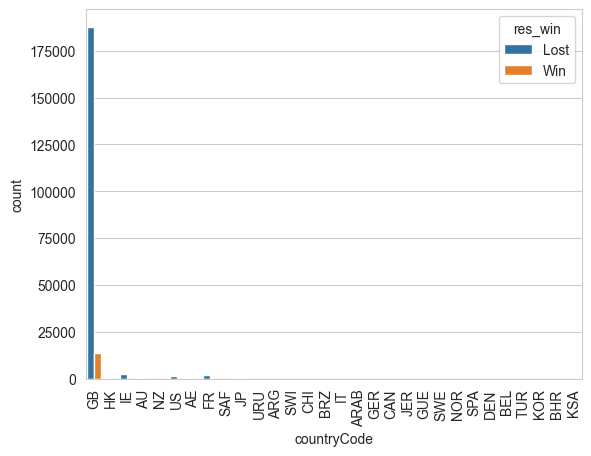

In [221]:
countriwise_result(df)

## Unique countries for Win and Lost ##

In [222]:
df['countryCode'].values

array(['GB', 'GB', 'GB', ..., 'US', 'JP', 'NZ'], dtype=object)

In [223]:
win_country_count = df[df['res_win'] == 'Win']['countryCode'].value_counts().count()
win_1 = pd.Series(win_country_count,index=['GB'])
win_1

GB    1
dtype: int64

In [224]:
lost_country_count = df[df['res_win'] == 'Lost']['countryCode'].value_counts().count()
lost_1 = pd.Series(lost_country_count,index=['Others'])
lost_1

Others    30
dtype: int64

In [225]:
def total_country_count(df):
    total_country_count = pd.concat([win_1,lost_1],keys=['win', 'lost'],names=['category','country'])
    total_country_count.reset_index()
    total = pd.DataFrame(total_country_count.reset_index())
    total = total.rename(columns={0:'count'})
    return total

In [226]:
total_country_count(df)

,category,country,count
0,win,GB,1
1,lost,Others,30


In [227]:
def total_country_count(df):
    win_country_count = df[df['res_win'] == 'Win']['countryCode'].value_counts().count()
    win_1 = pd.Series(win_country_count,index=['GB'])
    lost_country_count = df[df['res_win'] == 'Lost']['countryCode'].value_counts().count()
    lost_1 = pd.Series(lost_country_count,index=['Others'])
    total_country_count = pd.concat([win_1,lost_1],keys=['win', 'lost'],names=['category','country'])
    total_country_count.reset_index()
    total = pd.DataFrame(total_country_count.reset_index())
    total = total.rename(columns={0:'count'})
    return total

In [228]:
total_country_count(df)

,category,country,count
0,win,GB,1
1,lost,Others,30


In [229]:
def unique_country(df):
    win_country_count = df[df['res_win'] == 'Win']['countryCode'].value_counts().count()
    lost_country_count = df[df['res_win'] == 'Lost']['countryCode'].value_counts().count()
    categories = ['GB', 'Others']
    values = [win_country_count, lost_country_count]
    fig = plt.bar(categories, values, color=['blue', 'orange'],label=['win','lost'])
    plt.xlabel('Result')
    plt.ylabel('Number of Unique Countries')
    plt.title('Unique Countries for Win and Lost')
    plt.legend()
    return fig

<BarContainer object of 2 artists>

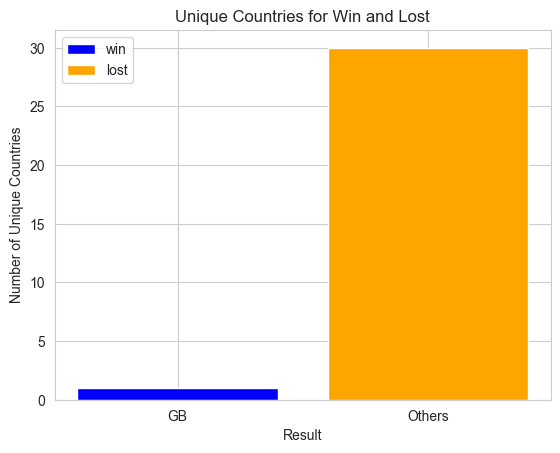

In [230]:
unique_country(df)

## Fav and non-fav horses and their winning frequency ##

In [231]:
df['isFav'].unique()

array([0, 1])

In [232]:
df['isFav'] = df['isFav'].map({0:'Not_fav',1:'Fav'})

In [233]:
df['isFav'].unique()

array(['Not_fav', 'Fav'], dtype=object)

In [234]:
def fav_horses_frq(df):
    return df.groupby('isFav')['res_win'].value_counts().reset_index()

In [235]:
fav_horses_frq(df)

,isFav,res_win,count
0,Fav,Lost,4770
1,Fav,Win,1124
2,Not_fav,Lost,191174
3,Not_fav,Win,12653


In [236]:
def fav_horses_freq(df):
    fig = sns.countplot(data=df,x='isFav',hue='res_win')
    plt.xlabel('Category')
    plt.ylabel('Winning_count')
    plt.title('Fav and non-fav horses and their winning frequency')
    return fig

<Axes: title={'center': 'Fav and non-fav horses and their winning frequency'}, xlabel='Category', ylabel='Winning_count'>

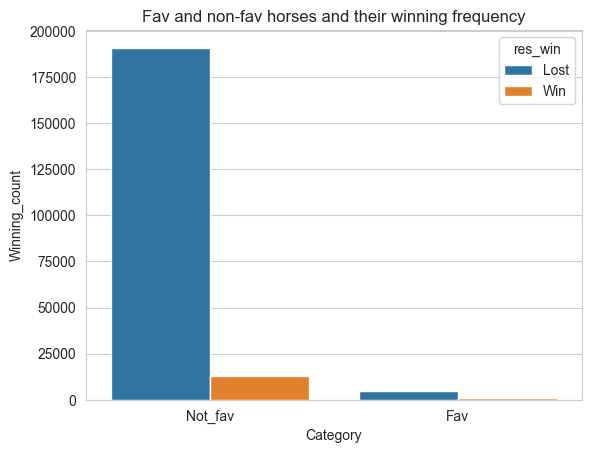

In [237]:
fav_horses_freq(df)

In [238]:
df.head(2)

,horseName,age,decimalPrice,isFav,trainerName,jockeyName,position,weight,res_win,date,rclass,countryCode,year,day,month
0,Fresh Power,5,0.182322,Not_fav,Y S Tsui,Silvestre De Sousa,3,40.60,Lost,2011-05-19,Class 4,GB,2011,Thursday,May
1,Happy Hour,4,0.017392,Not_fav,C H Yip,Umberto Rispoli,4,40.43,Lost,2011-05-19,Class 4,GB,2011,Thursday,May


## Distribution of Decimal Odds (decimalPrice) ##

In [239]:
def decimal_price_dist(df):
    return df['decimalPrice'].value_counts().reset_index()

In [240]:
decimal_price_dist(df)

,decimalPrice,count
0,0.080043,25470
1,0.057158,7826
2,0.074108,7556
3,0.064539,7207
4,0.087011,6922
...,...,...
489,0.213574,2
490,0.126913,2
491,0.220184,1
492,0.224148,1


In [241]:
def decimal_dist(df):
    fig = sns.histplot(df['decimalPrice'], bins=50, kde=True)
    plt.title('Distribution of Decimal Odds (decimalPrice)')
    plt.xlabel('Decimal Price')
    plt.ylabel('Frequency')
    return fig

<Axes: title={'center': 'Distribution of Decimal Odds (decimalPrice)'}, xlabel='Decimal Price', ylabel='Frequency'>

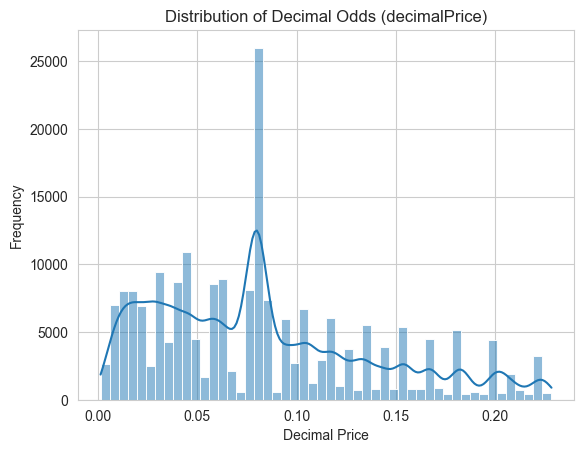

In [242]:
decimal_dist(df)

## Relationship between target and Odds ##

In [243]:
def get_relation(df):
    return df[['res_win','decimalPrice']]


In [244]:
get_relation(df)

,res_win,decimalPrice
0,Lost,0.182322
1,Lost,0.017392
2,Lost,0.087011
3,Lost,0.004577
4,Lost,0.028988
...,...,...
287386,Lost,0.080043
287387,Lost,0.080043
287388,Lost,0.080043
287389,Lost,0.080043


In [245]:
def target_relt(df):
    fig = sns.boxplot(x='res_win', y='decimalPrice', data=df)
    plt.title('Decimal Price vs Target')
    plt.xlabel('Target (Win/Lost)')
    plt.ylabel('Decimal Price')
    return fig

<Axes: title={'center': 'Decimal Price vs Target'}, xlabel='Target (Win/Lost)', ylabel='Decimal Price'>

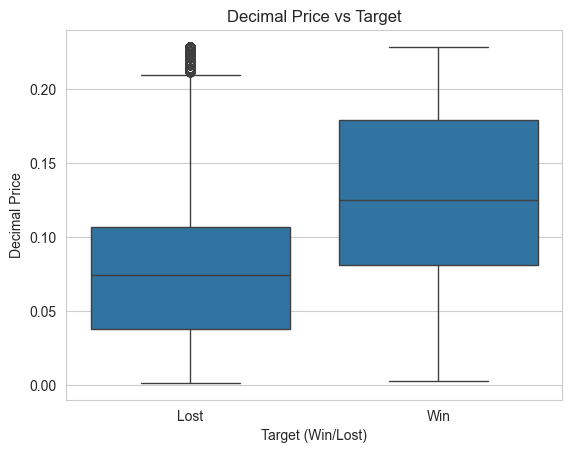

In [246]:
target_relt(df)

## Jockeys won race count ##

In [247]:
def get_jockeys_count(df):
    jockey_count = df[df['res_win'] == 'Win']['jockeyName'].value_counts().reset_index().nlargest(10,'count')
    return jockey_count

In [248]:
get_jockeys_count(df)

,jockeyName,count
0,Tom Marquand,177
1,Oisin Murphy,171
2,Ben Curtis,168
3,Hollie Doyle,153
4,Pierre-Charles Boudot,150
5,Mickael Barzalona,143
6,Maxime Guyon,143
7,David Probert,132
8,Silvestre De Sousa,121
9,Joe Fanning,120


In [249]:
def jockeys_won_count(df):
    jockey_count = df[df['res_win'] == 'Win']['jockeyName'].value_counts().reset_index().nlargest(10,'count')
    fig = jockey_count.plot(kind='bar',x='jockeyName',color='skyblue')
    plt.xticks(rotation = 90)
    plt.xlabel('Jockey_names')
    plt.ylabel('Winning_race_count')
    plt.tight_layout()
    return fig


<Axes: xlabel='Jockey_names', ylabel='Winning_race_count'>

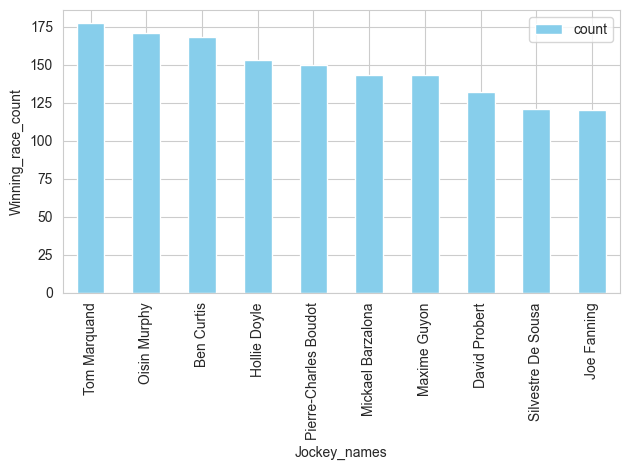

In [250]:
jockeys_won_count(df)

## Jockeys Lost race count ##

In [251]:
def get_jockey_loss_count(df):
    jockey_loss_count = df[df['res_win'] == 'Lost']['jockeyName'].value_counts().reset_index().nlargest(10,'count')
    return jockey_loss_count

In [252]:
get_jockey_loss_count(df)

,jockeyName,count
0,Luke Morris,22907
1,David Probert,1649
2,Tom Marquand,1527
3,Ben Curtis,1349
4,Hollie Doyle,1250
5,Oisin Murphy,1215
6,Maxime Guyon,1151
7,P J McDonald,1132
8,Kieran O'Neill,1116
9,Cristian Demuro,1110


In [253]:
def jockey_loss_count(df):
    jockey_loss_count = df[df['res_win'] == 'Lost']['jockeyName'].value_counts().reset_index().nlargest(10,'count')
    fig = jockey_loss_count.plot(kind='bar',x='jockeyName',color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel('Jockey_names')
    plt.ylabel('lost_race_count')
    plt.title('Jockeys Lost_race count')
    plt.tight_layout()
    return fig

<Axes: title={'center': 'Jockeys Lost_race count'}, xlabel='Jockey_names', ylabel='lost_race_count'>

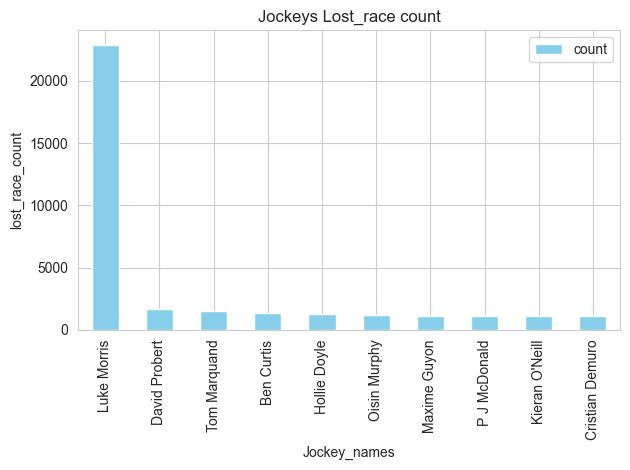

In [254]:
jockey_loss_count(df)

## Bottom jockeys race count ##

In [255]:
def get_bottom_jockeys_count(df):
    bottom_jockeys = df.groupby('jockeyName')['res_win'].value_counts().reset_index().nsmallest(10,'count')
    return bottom_jockeys

In [256]:
get_bottom_jockeys_count(df)

,jockeyName,res_win,count
3,A Almaymouni,Lost,1
8,A Correia,Win,1
9,A D Migheli,Lost,1
13,A Gulart,Win,1
17,A M Almussa,Lost,1
19,A M bin Said Al Balushi,Lost,1
23,A Mota,Win,1
25,A Queiroz,Lost,1
31,Aaron Jones,Win,1
34,Aaron Sweeney,Lost,1


In [257]:
def bottom_jockeys_count(df):
    new = df.groupby('jockeyName')['res_win'].value_counts().reset_index().nsmallest(10,'count')
    fig = sns.countplot(data=new,x='jockeyName',hue='res_win')
    plt.xticks(rotation=90)
    plt.title('Bottom jockeys race count')
    plt.tight_layout()
    return fig                  

<Axes: title={'center': 'Bottom jockeys race count'}, xlabel='jockeyName', ylabel='count'>

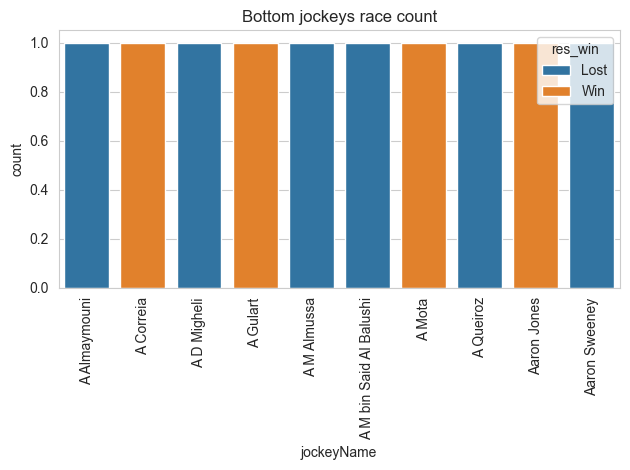

In [258]:
bottom_jockeys_count(df)

In [259]:
df.groupby('res_win')['trainerName'].value_counts().reset_index()

,res_win,trainerName,count
0,Lost,Richard Fahey,23238
1,Lost,Mark Johnston,1860
2,Lost,Richard Hannon,1849
3,Lost,Tim Easterby,1721
4,Lost,Michael Appleby,1332
...,...,...,...
6400,Win,Yoshiyasu Takahashi,1
6401,Win,Yuichi Shikato,1
6402,Win,Yuji Iida,1
6403,Win,Z Oosthuizen,1


In [260]:
def get_top_10_trainers(df):
    top_trainers = df[df['res_win'] == 'Win']['trainerName'].value_counts().reset_index().nlargest(10,'count')
    return top_trainers

In [261]:
get_top_10_trainers(df)

,trainerName,count
0,Mark Johnston,200
1,Richard Fahey,193
2,Richard Hannon,162
3,Tim Easterby,159
4,David O'Meara,132
5,Andrew Balding,119
6,A P O'Brien,114
7,Joseph Patrick O'Brien,109
8,Michael Appleby,101
9,John Gosden,100


## Top 10 Trainers ##

In [262]:
def top_10_trainers(df):
    top_trainers = df[df['res_win'] == 'Win']['trainerName'].value_counts().reset_index().nlargest(10,'count')
    fig = top_trainers.plot(kind='bar',x='trainerName',color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel('Trainer names')
    plt.title('Top 10 Trainers')
    plt.tight_layout()
    return fig

<Axes: title={'center': 'Top 10 Trainers'}, xlabel='Trainer names'>

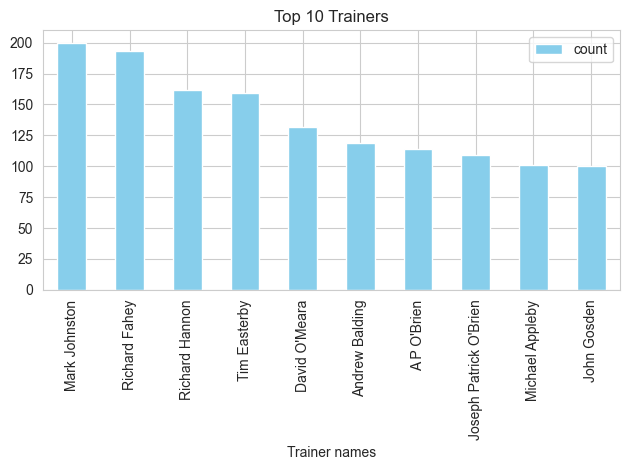

In [263]:
top_10_trainers(df)

## Top 10 Lost Trainers ##

In [264]:
def get_lost_trainers(df):
    lost_trainers = df[df['res_win'] == 'Lost']['trainerName'].value_counts().reset_index().nlargest(10,'count')
    return lost_trainers

In [265]:
get_lost_trainers(df)

,trainerName,count
0,Richard Fahey,23238
1,Mark Johnston,1860
2,Richard Hannon,1849
3,Tim Easterby,1721
4,Michael Appleby,1332
5,David O'Meara,1199
6,Joseph Patrick O'Brien,1179
7,Andrew Balding,1067
8,A P O'Brien,1032
9,Y S Tsui,961


In [266]:
def top_lost_trainers(df):
    lost_trainers = df[df['res_win'] == 'Lost']['trainerName'].value_counts().reset_index().nlargest(10,'count')
    fig = lost_trainers.plot(kind='bar',x='trainerName',color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel('Trainer Names')
    plt.title('Top 10 Loosing Trainers')
    plt.tight_layout()
    return fig

<Axes: title={'center': 'Top 10 Loosing Trainers'}, xlabel='Trainer Names'>

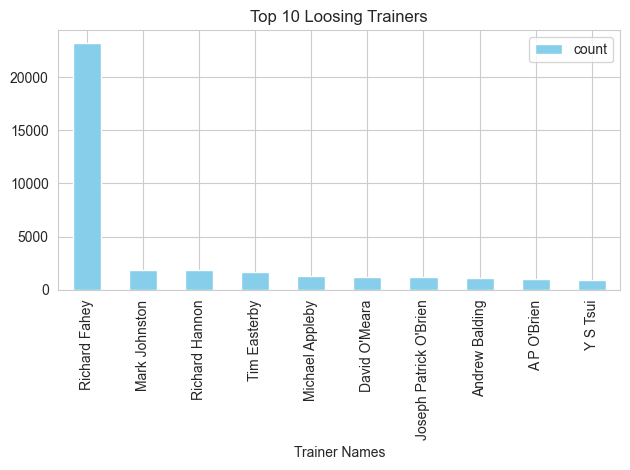

In [267]:
top_lost_trainers(df)